In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
#Rescale -1 to 1
x_train = x_train/127.5-1
x_train = np.expand_dims(x_train, axis=3)

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [43]:
def model_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

#build the generator
generator = model_generator()
#the generator takes noise as input and generates imgs
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dense_36 (Dense)             (None, 1024)            

In [44]:
def model_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

#build and compile the discriminator
discriminator = model_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
#for the combined model we will only train the generator
discriminator.trainable = False

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_______________________________________________

In [0]:
#the discriminator takes generated images as input and determines validity
validity = discriminator(img)
#the combined model  (stacked generator and discriminator)
#trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r * c, 100))
  gen_imgs = generator.predict(noise)
  
  # Rescale images 0 - 1
  gen_imgs = 0.5 * gen_imgs + 0.5
  
  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
      axs[i,j].axis('off')
      cnt += 1
      plt.show()
      plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.968422, acc.: 18.75%] [G loss: 0.639984]


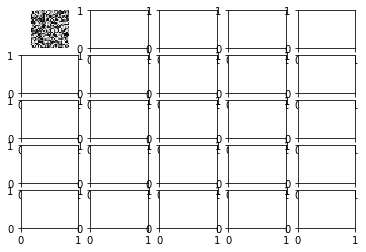

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.586522, acc.: 59.38%] [G loss: 0.675888]
2 [D loss: 0.491362, acc.: 62.50%] [G loss: 0.805213]
3 [D loss: 0.346853, acc.: 87.50%] [G loss: 0.866623]
4 [D loss: 0.324975, acc.: 89.06%] [G loss: 0.961785]
5 [D loss: 0.304388, acc.: 89.06%] [G loss: 1.119841]
6 [D loss: 0.236705, acc.: 98.44%] [G loss: 1.225122]
7 [D loss: 0.201552, acc.: 100.00%] [G loss: 1.262613]
8 [D loss: 0.201060, acc.: 98.44%] [G loss: 1.336554]
9 [D loss: 0.195875, acc.: 100.00%] [G loss: 1.438823]
10 [D loss: 0.193389, acc.: 100.00%] [G loss: 1.496577]
11 [D loss: 0.163181, acc.: 100.00%] [G loss: 1.594926]
12 [D loss: 0.130555, acc.: 100.00%] [G loss: 1.794585]
13 [D loss: 0.131431, acc.: 100.00%] [G loss: 1.787462]
14 [D loss: 0.111901, acc.: 100.00%] [G loss: 1.894176]
15 [D loss: 0.120804, acc.: 100.00%] [G loss: 1.915968]
16 [D loss: 0.099063, acc.: 100.00%] [G loss: 1.938089]
17 [D loss: 0.096415, acc.: 100.00%] [G loss: 1.996063]
18 [D loss: 0.099427, acc.: 100.00%] [G loss: 2.091461]
19 [D lo

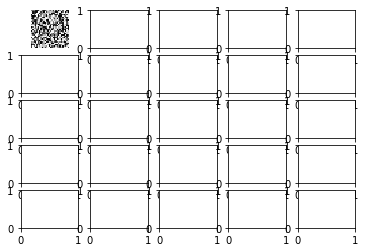

51 [D loss: 0.025341, acc.: 100.00%] [G loss: 3.242800]
52 [D loss: 0.024702, acc.: 100.00%] [G loss: 3.430636]
53 [D loss: 0.023243, acc.: 100.00%] [G loss: 3.398534]
54 [D loss: 0.022433, acc.: 100.00%] [G loss: 3.556715]
55 [D loss: 0.030224, acc.: 100.00%] [G loss: 3.549388]
56 [D loss: 0.091294, acc.: 98.44%] [G loss: 3.377678]
57 [D loss: 0.028259, acc.: 100.00%] [G loss: 3.443855]
58 [D loss: 0.021950, acc.: 100.00%] [G loss: 3.466301]
59 [D loss: 0.035965, acc.: 100.00%] [G loss: 3.477591]
60 [D loss: 0.022853, acc.: 100.00%] [G loss: 3.494376]
61 [D loss: 0.025278, acc.: 100.00%] [G loss: 3.376620]
62 [D loss: 0.023882, acc.: 100.00%] [G loss: 3.572506]
63 [D loss: 0.019557, acc.: 100.00%] [G loss: 3.588819]
64 [D loss: 0.028632, acc.: 100.00%] [G loss: 3.551530]
65 [D loss: 0.024267, acc.: 100.00%] [G loss: 3.734261]
66 [D loss: 0.026627, acc.: 100.00%] [G loss: 3.742652]
67 [D loss: 0.031464, acc.: 100.00%] [G loss: 3.754948]
68 [D loss: 0.032460, acc.: 100.00%] [G loss: 3.8

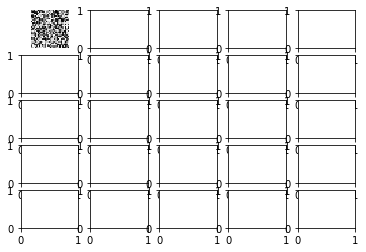

101 [D loss: 0.035241, acc.: 100.00%] [G loss: 4.194497]
102 [D loss: 0.022333, acc.: 100.00%] [G loss: 4.242665]
103 [D loss: 0.024221, acc.: 100.00%] [G loss: 4.408388]
104 [D loss: 0.012830, acc.: 100.00%] [G loss: 4.294384]
105 [D loss: 0.025142, acc.: 100.00%] [G loss: 4.420691]
106 [D loss: 0.015107, acc.: 100.00%] [G loss: 4.425426]
107 [D loss: 0.021080, acc.: 100.00%] [G loss: 4.224165]
108 [D loss: 0.016264, acc.: 100.00%] [G loss: 4.351175]
109 [D loss: 0.018261, acc.: 100.00%] [G loss: 4.148022]
110 [D loss: 0.021131, acc.: 100.00%] [G loss: 4.480433]
111 [D loss: 0.024410, acc.: 98.44%] [G loss: 4.242580]
112 [D loss: 0.025738, acc.: 100.00%] [G loss: 4.288453]
113 [D loss: 0.019390, acc.: 100.00%] [G loss: 4.248634]
114 [D loss: 0.019600, acc.: 100.00%] [G loss: 4.385006]
115 [D loss: 0.039490, acc.: 100.00%] [G loss: 4.474490]
116 [D loss: 0.031914, acc.: 100.00%] [G loss: 4.485777]
117 [D loss: 0.025161, acc.: 100.00%] [G loss: 4.583323]
118 [D loss: 0.018697, acc.: 100

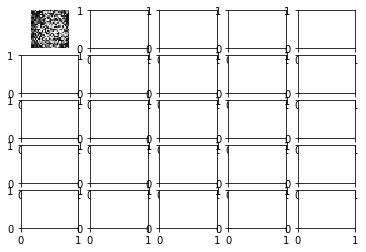

151 [D loss: 0.023809, acc.: 100.00%] [G loss: 4.857915]
152 [D loss: 0.077747, acc.: 100.00%] [G loss: 4.922324]
153 [D loss: 0.109592, acc.: 93.75%] [G loss: 4.721104]
154 [D loss: 0.031931, acc.: 100.00%] [G loss: 5.087771]
155 [D loss: 0.039445, acc.: 100.00%] [G loss: 4.732696]
156 [D loss: 0.134986, acc.: 93.75%] [G loss: 4.345792]
157 [D loss: 0.066042, acc.: 95.31%] [G loss: 4.496894]
158 [D loss: 0.052369, acc.: 100.00%] [G loss: 4.716271]
159 [D loss: 0.087356, acc.: 96.88%] [G loss: 4.751138]
160 [D loss: 0.023346, acc.: 100.00%] [G loss: 5.013258]
161 [D loss: 0.066016, acc.: 96.88%] [G loss: 4.947133]
162 [D loss: 0.027389, acc.: 100.00%] [G loss: 4.727440]
163 [D loss: 0.054850, acc.: 98.44%] [G loss: 4.494209]
164 [D loss: 0.085047, acc.: 98.44%] [G loss: 4.503627]
165 [D loss: 0.026177, acc.: 100.00%] [G loss: 4.622569]
166 [D loss: 0.026770, acc.: 100.00%] [G loss: 4.658327]
167 [D loss: 0.028229, acc.: 100.00%] [G loss: 4.652064]
168 [D loss: 0.158081, acc.: 95.31%] [

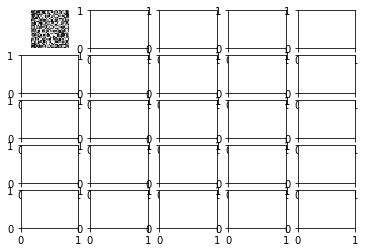

201 [D loss: 0.062787, acc.: 100.00%] [G loss: 4.369767]
202 [D loss: 0.157795, acc.: 93.75%] [G loss: 4.258665]
203 [D loss: 0.116596, acc.: 95.31%] [G loss: 4.617315]
204 [D loss: 0.144201, acc.: 93.75%] [G loss: 4.511649]
205 [D loss: 0.075427, acc.: 98.44%] [G loss: 4.382974]
206 [D loss: 0.129618, acc.: 95.31%] [G loss: 4.319682]
207 [D loss: 0.055667, acc.: 100.00%] [G loss: 4.346826]
208 [D loss: 0.263104, acc.: 87.50%] [G loss: 3.159341]
209 [D loss: 0.223762, acc.: 87.50%] [G loss: 4.686856]
210 [D loss: 0.289411, acc.: 92.19%] [G loss: 3.533678]
211 [D loss: 0.105866, acc.: 98.44%] [G loss: 3.904902]
212 [D loss: 0.089210, acc.: 98.44%] [G loss: 3.827669]
213 [D loss: 0.146279, acc.: 95.31%] [G loss: 4.293918]
214 [D loss: 0.048363, acc.: 100.00%] [G loss: 4.336480]
215 [D loss: 0.105952, acc.: 98.44%] [G loss: 4.139657]
216 [D loss: 0.118041, acc.: 95.31%] [G loss: 4.273804]
217 [D loss: 0.095641, acc.: 96.88%] [G loss: 4.233229]
218 [D loss: 0.237705, acc.: 90.62%] [G loss:

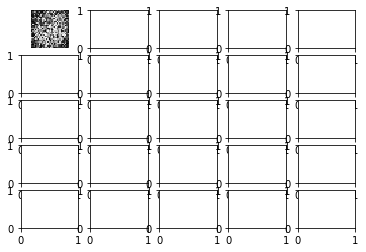

251 [D loss: 0.265100, acc.: 92.19%] [G loss: 3.475642]
252 [D loss: 0.149071, acc.: 95.31%] [G loss: 3.866365]
253 [D loss: 0.088967, acc.: 100.00%] [G loss: 3.943566]
254 [D loss: 0.212786, acc.: 90.62%] [G loss: 3.647602]
255 [D loss: 0.112668, acc.: 96.88%] [G loss: 3.940783]
256 [D loss: 0.256112, acc.: 90.62%] [G loss: 4.002346]
257 [D loss: 0.337649, acc.: 81.25%] [G loss: 4.007751]
258 [D loss: 0.134567, acc.: 98.44%] [G loss: 3.750196]
259 [D loss: 0.298711, acc.: 82.81%] [G loss: 3.369692]
260 [D loss: 0.168183, acc.: 96.88%] [G loss: 3.700133]
261 [D loss: 0.326653, acc.: 85.94%] [G loss: 3.607028]
262 [D loss: 0.148888, acc.: 93.75%] [G loss: 3.699470]
263 [D loss: 0.330046, acc.: 84.38%] [G loss: 3.224534]
264 [D loss: 0.213957, acc.: 95.31%] [G loss: 3.949127]
265 [D loss: 0.141575, acc.: 95.31%] [G loss: 3.687165]
266 [D loss: 0.187941, acc.: 92.19%] [G loss: 3.989104]
267 [D loss: 0.175966, acc.: 95.31%] [G loss: 3.690226]
268 [D loss: 0.235839, acc.: 90.62%] [G loss: 3

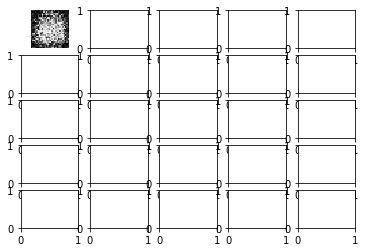

301 [D loss: 0.291153, acc.: 92.19%] [G loss: 3.421426]
302 [D loss: 0.398929, acc.: 82.81%] [G loss: 3.786110]
303 [D loss: 0.425960, acc.: 81.25%] [G loss: 3.189607]
304 [D loss: 0.219708, acc.: 92.19%] [G loss: 4.206314]
305 [D loss: 0.504443, acc.: 79.69%] [G loss: 2.582053]
306 [D loss: 0.264310, acc.: 87.50%] [G loss: 2.991567]
307 [D loss: 0.174464, acc.: 93.75%] [G loss: 4.737433]
308 [D loss: 0.311486, acc.: 93.75%] [G loss: 3.896339]
309 [D loss: 0.286322, acc.: 89.06%] [G loss: 3.069781]
310 [D loss: 0.438176, acc.: 79.69%] [G loss: 3.236869]
311 [D loss: 0.292078, acc.: 95.31%] [G loss: 3.831115]
312 [D loss: 0.318288, acc.: 85.94%] [G loss: 3.127509]
313 [D loss: 0.219711, acc.: 89.06%] [G loss: 3.225294]
314 [D loss: 0.205133, acc.: 93.75%] [G loss: 3.352959]
315 [D loss: 0.283614, acc.: 90.62%] [G loss: 3.565159]
316 [D loss: 0.520452, acc.: 76.56%] [G loss: 3.209581]
317 [D loss: 0.148244, acc.: 95.31%] [G loss: 3.089487]
318 [D loss: 0.379032, acc.: 85.94%] [G loss: 3.

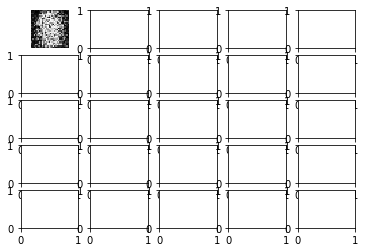

351 [D loss: 0.639166, acc.: 65.62%] [G loss: 3.649572]
352 [D loss: 0.754727, acc.: 59.38%] [G loss: 1.892923]
353 [D loss: 0.631455, acc.: 71.88%] [G loss: 3.602686]
354 [D loss: 0.324786, acc.: 87.50%] [G loss: 3.396361]
355 [D loss: 0.662912, acc.: 73.44%] [G loss: 1.826215]
356 [D loss: 0.440344, acc.: 78.12%] [G loss: 2.174021]
357 [D loss: 0.371697, acc.: 85.94%] [G loss: 2.605164]
358 [D loss: 0.380075, acc.: 85.94%] [G loss: 2.319483]
359 [D loss: 0.450331, acc.: 84.38%] [G loss: 2.530056]
360 [D loss: 0.732379, acc.: 62.50%] [G loss: 2.835221]
361 [D loss: 0.402307, acc.: 82.81%] [G loss: 2.926161]
362 [D loss: 0.285418, acc.: 87.50%] [G loss: 3.146056]
363 [D loss: 0.868349, acc.: 62.50%] [G loss: 1.966808]
364 [D loss: 0.747276, acc.: 54.69%] [G loss: 2.265850]
365 [D loss: 0.264685, acc.: 89.06%] [G loss: 2.580225]
366 [D loss: 0.344967, acc.: 89.06%] [G loss: 2.298624]
367 [D loss: 0.473371, acc.: 78.12%] [G loss: 2.856851]
368 [D loss: 1.234387, acc.: 43.75%] [G loss: 1.

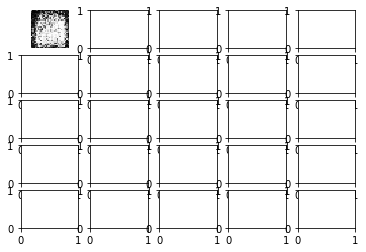

401 [D loss: 0.609589, acc.: 60.94%] [G loss: 1.422418]
402 [D loss: 0.421856, acc.: 78.12%] [G loss: 1.957232]
403 [D loss: 0.612338, acc.: 71.88%] [G loss: 1.513744]
404 [D loss: 0.774845, acc.: 57.81%] [G loss: 1.399094]
405 [D loss: 0.659260, acc.: 60.94%] [G loss: 1.488117]
406 [D loss: 0.876935, acc.: 53.12%] [G loss: 1.602412]
407 [D loss: 0.696778, acc.: 60.94%] [G loss: 1.542923]
408 [D loss: 0.718298, acc.: 68.75%] [G loss: 1.261535]
409 [D loss: 0.579606, acc.: 68.75%] [G loss: 1.600044]
410 [D loss: 0.737466, acc.: 65.62%] [G loss: 1.578380]
411 [D loss: 0.538076, acc.: 81.25%] [G loss: 1.400915]
412 [D loss: 0.784211, acc.: 56.25%] [G loss: 1.274641]
413 [D loss: 0.670029, acc.: 64.06%] [G loss: 1.344147]
414 [D loss: 0.702967, acc.: 65.62%] [G loss: 1.388156]
415 [D loss: 0.588017, acc.: 60.94%] [G loss: 1.357542]
416 [D loss: 0.525477, acc.: 75.00%] [G loss: 1.446894]
417 [D loss: 0.614600, acc.: 71.88%] [G loss: 1.537082]
418 [D loss: 0.700941, acc.: 60.94%] [G loss: 1.

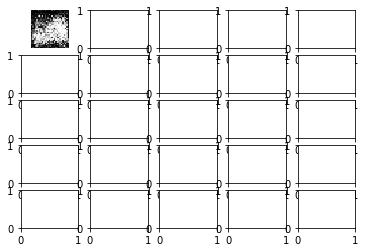

451 [D loss: 0.572269, acc.: 70.31%] [G loss: 1.257123]
452 [D loss: 0.583987, acc.: 75.00%] [G loss: 1.331429]
453 [D loss: 0.604113, acc.: 70.31%] [G loss: 1.388407]
454 [D loss: 0.599171, acc.: 64.06%] [G loss: 1.314551]
455 [D loss: 0.627117, acc.: 65.62%] [G loss: 1.184922]
456 [D loss: 0.596840, acc.: 65.62%] [G loss: 1.154497]
457 [D loss: 0.608759, acc.: 71.88%] [G loss: 1.264344]
458 [D loss: 0.552695, acc.: 73.44%] [G loss: 1.421857]
459 [D loss: 0.635884, acc.: 76.56%] [G loss: 1.319325]
460 [D loss: 0.628199, acc.: 67.19%] [G loss: 1.245087]
461 [D loss: 0.590329, acc.: 73.44%] [G loss: 1.137009]
462 [D loss: 0.599135, acc.: 75.00%] [G loss: 1.124802]
463 [D loss: 0.498422, acc.: 76.56%] [G loss: 1.188086]
464 [D loss: 0.613765, acc.: 78.12%] [G loss: 1.254127]
465 [D loss: 0.614004, acc.: 70.31%] [G loss: 1.126906]
466 [D loss: 0.731905, acc.: 60.94%] [G loss: 1.008106]
467 [D loss: 0.510216, acc.: 75.00%] [G loss: 1.131251]
468 [D loss: 0.563805, acc.: 71.88%] [G loss: 1.

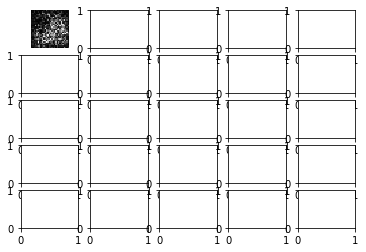

501 [D loss: 0.665583, acc.: 65.62%] [G loss: 1.190054]
502 [D loss: 0.504226, acc.: 79.69%] [G loss: 1.201598]
503 [D loss: 0.602769, acc.: 78.12%] [G loss: 1.152491]
504 [D loss: 0.682206, acc.: 57.81%] [G loss: 1.001614]
505 [D loss: 0.594642, acc.: 73.44%] [G loss: 1.151072]
506 [D loss: 0.602698, acc.: 56.25%] [G loss: 1.083123]
507 [D loss: 0.603265, acc.: 64.06%] [G loss: 1.133633]
508 [D loss: 0.562750, acc.: 71.88%] [G loss: 1.189176]
509 [D loss: 0.600917, acc.: 68.75%] [G loss: 1.053158]
510 [D loss: 0.596962, acc.: 59.38%] [G loss: 1.083191]
511 [D loss: 0.625876, acc.: 64.06%] [G loss: 1.080746]
512 [D loss: 0.549193, acc.: 79.69%] [G loss: 1.244191]
513 [D loss: 0.567529, acc.: 73.44%] [G loss: 1.216277]
514 [D loss: 0.584143, acc.: 71.88%] [G loss: 1.232591]
515 [D loss: 0.635497, acc.: 65.62%] [G loss: 1.099754]
516 [D loss: 0.643884, acc.: 59.38%] [G loss: 1.125567]
517 [D loss: 0.568454, acc.: 73.44%] [G loss: 1.151214]
518 [D loss: 0.607674, acc.: 68.75%] [G loss: 1.

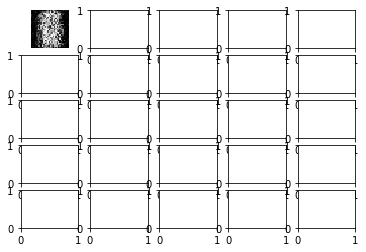

551 [D loss: 0.520019, acc.: 76.56%] [G loss: 1.075074]
552 [D loss: 0.576910, acc.: 70.31%] [G loss: 1.085722]
553 [D loss: 0.472970, acc.: 78.12%] [G loss: 1.179182]
554 [D loss: 0.637387, acc.: 70.31%] [G loss: 1.232041]
555 [D loss: 0.616086, acc.: 70.31%] [G loss: 1.215001]
556 [D loss: 0.624493, acc.: 70.31%] [G loss: 1.267004]
557 [D loss: 0.729578, acc.: 51.56%] [G loss: 1.087824]
558 [D loss: 0.653437, acc.: 60.94%] [G loss: 1.201721]
559 [D loss: 0.688035, acc.: 54.69%] [G loss: 1.008503]
560 [D loss: 0.719285, acc.: 50.00%] [G loss: 1.012364]
561 [D loss: 0.584742, acc.: 65.62%] [G loss: 0.932284]
562 [D loss: 0.689770, acc.: 56.25%] [G loss: 0.999451]
563 [D loss: 0.593136, acc.: 68.75%] [G loss: 1.086873]
564 [D loss: 0.757008, acc.: 57.81%] [G loss: 0.998434]
565 [D loss: 0.586274, acc.: 75.00%] [G loss: 0.929183]
566 [D loss: 0.700971, acc.: 53.12%] [G loss: 1.107952]
567 [D loss: 0.597912, acc.: 65.62%] [G loss: 1.075917]
568 [D loss: 0.652521, acc.: 65.62%] [G loss: 1.

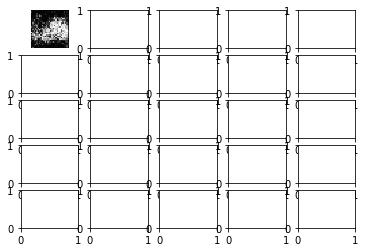

601 [D loss: 0.522855, acc.: 75.00%] [G loss: 1.089259]
602 [D loss: 0.586166, acc.: 73.44%] [G loss: 1.041106]
603 [D loss: 0.613274, acc.: 68.75%] [G loss: 1.033433]
604 [D loss: 0.573496, acc.: 68.75%] [G loss: 0.917480]
605 [D loss: 0.593393, acc.: 65.62%] [G loss: 1.070472]
606 [D loss: 0.660188, acc.: 67.19%] [G loss: 1.066712]
607 [D loss: 0.573455, acc.: 73.44%] [G loss: 1.038367]
608 [D loss: 0.538848, acc.: 75.00%] [G loss: 1.097092]
609 [D loss: 0.690777, acc.: 57.81%] [G loss: 0.983006]
610 [D loss: 0.672390, acc.: 54.69%] [G loss: 1.026022]
611 [D loss: 0.626342, acc.: 67.19%] [G loss: 1.061786]
612 [D loss: 0.606129, acc.: 67.19%] [G loss: 1.059537]
613 [D loss: 0.548368, acc.: 81.25%] [G loss: 1.027708]
614 [D loss: 0.677319, acc.: 59.38%] [G loss: 1.000200]
615 [D loss: 0.616112, acc.: 73.44%] [G loss: 1.195009]
616 [D loss: 0.632845, acc.: 65.62%] [G loss: 1.074559]
617 [D loss: 0.661326, acc.: 67.19%] [G loss: 1.073860]
618 [D loss: 0.601358, acc.: 68.75%] [G loss: 0.

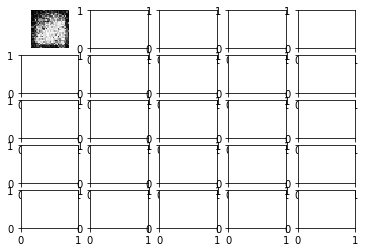

651 [D loss: 0.505907, acc.: 79.69%] [G loss: 0.920180]
652 [D loss: 0.631298, acc.: 64.06%] [G loss: 0.951261]
653 [D loss: 0.517987, acc.: 75.00%] [G loss: 0.940910]
654 [D loss: 0.551400, acc.: 71.88%] [G loss: 1.083395]
655 [D loss: 0.582627, acc.: 62.50%] [G loss: 0.961077]
656 [D loss: 0.575932, acc.: 73.44%] [G loss: 1.041831]
657 [D loss: 0.542312, acc.: 71.88%] [G loss: 1.001805]
658 [D loss: 0.529713, acc.: 70.31%] [G loss: 0.989745]
659 [D loss: 0.571713, acc.: 70.31%] [G loss: 1.039803]
660 [D loss: 0.647942, acc.: 67.19%] [G loss: 0.980766]
661 [D loss: 0.572670, acc.: 68.75%] [G loss: 1.086904]
662 [D loss: 0.703079, acc.: 59.38%] [G loss: 0.996803]
663 [D loss: 0.597099, acc.: 65.62%] [G loss: 1.082421]
664 [D loss: 0.578337, acc.: 67.19%] [G loss: 1.092157]
665 [D loss: 0.562923, acc.: 73.44%] [G loss: 0.965473]
666 [D loss: 0.614553, acc.: 67.19%] [G loss: 0.940653]
667 [D loss: 0.517808, acc.: 75.00%] [G loss: 1.040195]
668 [D loss: 0.616083, acc.: 71.88%] [G loss: 1.

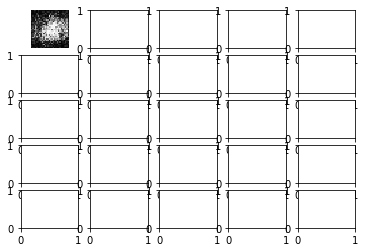

701 [D loss: 0.578786, acc.: 65.62%] [G loss: 0.899858]
702 [D loss: 0.667885, acc.: 59.38%] [G loss: 1.059443]
703 [D loss: 0.617675, acc.: 64.06%] [G loss: 0.982106]
704 [D loss: 0.611262, acc.: 70.31%] [G loss: 0.917853]
705 [D loss: 0.578847, acc.: 73.44%] [G loss: 0.940736]
706 [D loss: 0.631231, acc.: 64.06%] [G loss: 1.033773]
707 [D loss: 0.598137, acc.: 67.19%] [G loss: 1.046150]
708 [D loss: 0.660314, acc.: 62.50%] [G loss: 1.020760]
709 [D loss: 0.525464, acc.: 81.25%] [G loss: 0.987963]
710 [D loss: 0.686240, acc.: 62.50%] [G loss: 1.036067]
711 [D loss: 0.625542, acc.: 64.06%] [G loss: 1.063403]
712 [D loss: 0.677236, acc.: 59.38%] [G loss: 1.003624]
713 [D loss: 0.605428, acc.: 54.69%] [G loss: 0.967670]
714 [D loss: 0.654687, acc.: 62.50%] [G loss: 0.887606]
715 [D loss: 0.529236, acc.: 76.56%] [G loss: 1.016021]
716 [D loss: 0.689571, acc.: 60.94%] [G loss: 0.990891]
717 [D loss: 0.612726, acc.: 71.88%] [G loss: 0.916772]
718 [D loss: 0.595666, acc.: 68.75%] [G loss: 0.

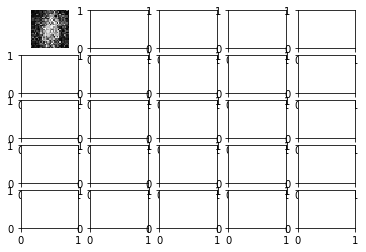

751 [D loss: 0.580540, acc.: 76.56%] [G loss: 1.018302]
752 [D loss: 0.591525, acc.: 67.19%] [G loss: 0.936212]
753 [D loss: 0.635070, acc.: 68.75%] [G loss: 0.975722]
754 [D loss: 0.606409, acc.: 65.62%] [G loss: 0.930539]
755 [D loss: 0.610731, acc.: 64.06%] [G loss: 0.985202]
756 [D loss: 0.645844, acc.: 62.50%] [G loss: 0.951971]
757 [D loss: 0.535587, acc.: 81.25%] [G loss: 0.946633]
758 [D loss: 0.591104, acc.: 68.75%] [G loss: 0.881441]
759 [D loss: 0.588830, acc.: 68.75%] [G loss: 0.932596]
760 [D loss: 0.611509, acc.: 60.94%] [G loss: 0.947402]
761 [D loss: 0.544011, acc.: 73.44%] [G loss: 1.032273]
762 [D loss: 0.561681, acc.: 76.56%] [G loss: 1.036601]
763 [D loss: 0.598916, acc.: 65.62%] [G loss: 1.017103]
764 [D loss: 0.570836, acc.: 71.88%] [G loss: 0.998279]
765 [D loss: 0.579321, acc.: 70.31%] [G loss: 0.995538]
766 [D loss: 0.641589, acc.: 60.94%] [G loss: 1.031850]
767 [D loss: 0.598191, acc.: 65.62%] [G loss: 1.024333]
768 [D loss: 0.612702, acc.: 70.31%] [G loss: 0.

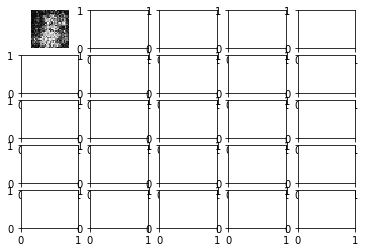

801 [D loss: 0.555763, acc.: 78.12%] [G loss: 0.986172]
802 [D loss: 0.581309, acc.: 68.75%] [G loss: 0.946992]
803 [D loss: 0.675149, acc.: 59.38%] [G loss: 0.961993]
804 [D loss: 0.591420, acc.: 71.88%] [G loss: 0.889689]
805 [D loss: 0.599163, acc.: 70.31%] [G loss: 0.889136]
806 [D loss: 0.581456, acc.: 68.75%] [G loss: 0.926880]
807 [D loss: 0.593372, acc.: 75.00%] [G loss: 0.954362]
808 [D loss: 0.596597, acc.: 67.19%] [G loss: 1.011526]
809 [D loss: 0.622854, acc.: 67.19%] [G loss: 0.977317]
810 [D loss: 0.617481, acc.: 67.19%] [G loss: 1.029370]
811 [D loss: 0.594771, acc.: 62.50%] [G loss: 0.967195]
812 [D loss: 0.600242, acc.: 67.19%] [G loss: 0.932434]
813 [D loss: 0.530951, acc.: 76.56%] [G loss: 0.999140]
814 [D loss: 0.579115, acc.: 70.31%] [G loss: 1.015744]
815 [D loss: 0.592311, acc.: 68.75%] [G loss: 1.018642]
816 [D loss: 0.614651, acc.: 67.19%] [G loss: 1.009096]
817 [D loss: 0.561861, acc.: 73.44%] [G loss: 1.041064]
818 [D loss: 0.677977, acc.: 62.50%] [G loss: 0.

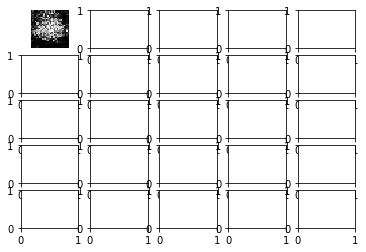

851 [D loss: 0.611614, acc.: 73.44%] [G loss: 1.022674]
852 [D loss: 0.559373, acc.: 71.88%] [G loss: 1.054672]
853 [D loss: 0.682726, acc.: 53.12%] [G loss: 0.867776]
854 [D loss: 0.590447, acc.: 62.50%] [G loss: 0.913205]
855 [D loss: 0.627294, acc.: 65.62%] [G loss: 0.975133]
856 [D loss: 0.685327, acc.: 59.38%] [G loss: 0.836129]
857 [D loss: 0.651300, acc.: 59.38%] [G loss: 0.857565]
858 [D loss: 0.585504, acc.: 70.31%] [G loss: 0.910295]
859 [D loss: 0.656376, acc.: 64.06%] [G loss: 1.078943]
860 [D loss: 0.609952, acc.: 64.06%] [G loss: 1.055606]
861 [D loss: 0.636679, acc.: 68.75%] [G loss: 1.022363]
862 [D loss: 0.655633, acc.: 64.06%] [G loss: 1.002421]
863 [D loss: 0.581090, acc.: 78.12%] [G loss: 0.980328]
864 [D loss: 0.544805, acc.: 81.25%] [G loss: 0.980510]
865 [D loss: 0.590566, acc.: 64.06%] [G loss: 1.007690]
866 [D loss: 0.604775, acc.: 67.19%] [G loss: 0.962805]
867 [D loss: 0.561895, acc.: 75.00%] [G loss: 0.909979]
868 [D loss: 0.548439, acc.: 75.00%] [G loss: 0.

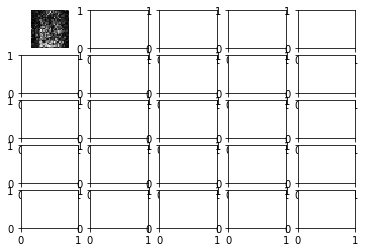

901 [D loss: 0.626793, acc.: 65.62%] [G loss: 1.016502]
902 [D loss: 0.597895, acc.: 65.62%] [G loss: 0.899793]
903 [D loss: 0.626409, acc.: 64.06%] [G loss: 0.997660]
904 [D loss: 0.576625, acc.: 70.31%] [G loss: 0.913671]
905 [D loss: 0.605196, acc.: 70.31%] [G loss: 0.923137]
906 [D loss: 0.543226, acc.: 76.56%] [G loss: 0.930395]
907 [D loss: 0.610292, acc.: 56.25%] [G loss: 0.961991]
908 [D loss: 0.625161, acc.: 68.75%] [G loss: 0.898591]
909 [D loss: 0.555448, acc.: 78.12%] [G loss: 0.910612]
910 [D loss: 0.555814, acc.: 76.56%] [G loss: 0.928893]
911 [D loss: 0.618976, acc.: 68.75%] [G loss: 1.112576]
912 [D loss: 0.546970, acc.: 73.44%] [G loss: 0.924499]
913 [D loss: 0.643603, acc.: 60.94%] [G loss: 0.895975]
914 [D loss: 0.581902, acc.: 68.75%] [G loss: 0.941354]
915 [D loss: 0.586039, acc.: 64.06%] [G loss: 0.933932]
916 [D loss: 0.488973, acc.: 79.69%] [G loss: 0.924206]
917 [D loss: 0.502722, acc.: 78.12%] [G loss: 1.057030]
918 [D loss: 0.586505, acc.: 68.75%] [G loss: 0.

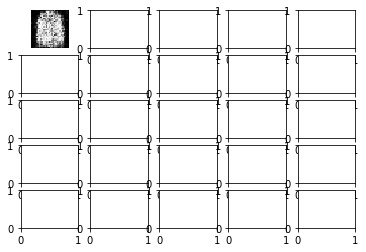

951 [D loss: 0.610548, acc.: 65.62%] [G loss: 0.901082]
952 [D loss: 0.614276, acc.: 62.50%] [G loss: 0.945778]
953 [D loss: 0.610125, acc.: 64.06%] [G loss: 0.883083]
954 [D loss: 0.544470, acc.: 79.69%] [G loss: 0.952950]
955 [D loss: 0.570918, acc.: 71.88%] [G loss: 1.003156]
956 [D loss: 0.728984, acc.: 64.06%] [G loss: 0.968725]
957 [D loss: 0.698684, acc.: 56.25%] [G loss: 1.011262]
958 [D loss: 0.680075, acc.: 59.38%] [G loss: 0.918719]
959 [D loss: 0.580921, acc.: 68.75%] [G loss: 0.886482]
960 [D loss: 0.587343, acc.: 65.62%] [G loss: 0.991981]
961 [D loss: 0.592759, acc.: 73.44%] [G loss: 1.038100]
962 [D loss: 0.627022, acc.: 68.75%] [G loss: 1.039117]
963 [D loss: 0.600463, acc.: 65.62%] [G loss: 0.922289]
964 [D loss: 0.555613, acc.: 75.00%] [G loss: 1.059333]
965 [D loss: 0.606070, acc.: 67.19%] [G loss: 1.031250]
966 [D loss: 0.633996, acc.: 65.62%] [G loss: 1.001796]
967 [D loss: 0.693065, acc.: 53.12%] [G loss: 0.935077]
968 [D loss: 0.617567, acc.: 68.75%] [G loss: 0.

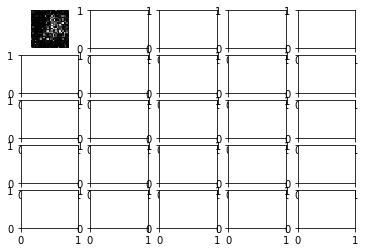

1001 [D loss: 0.622076, acc.: 62.50%] [G loss: 0.828488]
1002 [D loss: 0.590431, acc.: 70.31%] [G loss: 0.841183]
1003 [D loss: 0.603037, acc.: 67.19%] [G loss: 1.032796]
1004 [D loss: 0.582046, acc.: 71.88%] [G loss: 0.981747]
1005 [D loss: 0.627006, acc.: 70.31%] [G loss: 1.008870]
1006 [D loss: 0.675138, acc.: 65.62%] [G loss: 0.943411]
1007 [D loss: 0.697066, acc.: 51.56%] [G loss: 0.936055]
1008 [D loss: 0.647889, acc.: 57.81%] [G loss: 0.967739]
1009 [D loss: 0.585791, acc.: 67.19%] [G loss: 0.955638]
1010 [D loss: 0.656929, acc.: 60.94%] [G loss: 0.914316]
1011 [D loss: 0.667100, acc.: 57.81%] [G loss: 0.868847]
1012 [D loss: 0.641791, acc.: 60.94%] [G loss: 0.777252]
1013 [D loss: 0.635846, acc.: 57.81%] [G loss: 0.981943]
1014 [D loss: 0.592854, acc.: 67.19%] [G loss: 1.014126]
1015 [D loss: 0.704001, acc.: 54.69%] [G loss: 0.933851]
1016 [D loss: 0.666843, acc.: 56.25%] [G loss: 1.031160]
1017 [D loss: 0.620335, acc.: 70.31%] [G loss: 0.927489]
1018 [D loss: 0.586574, acc.: 7

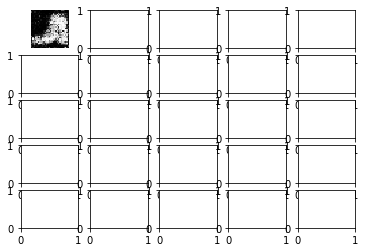

1051 [D loss: 0.706930, acc.: 56.25%] [G loss: 0.887332]
1052 [D loss: 0.558372, acc.: 76.56%] [G loss: 0.830123]
1053 [D loss: 0.604007, acc.: 60.94%] [G loss: 0.950971]
1054 [D loss: 0.590726, acc.: 67.19%] [G loss: 0.974547]
1055 [D loss: 0.694759, acc.: 54.69%] [G loss: 0.880062]
1056 [D loss: 0.595129, acc.: 59.38%] [G loss: 0.952564]
1057 [D loss: 0.596816, acc.: 67.19%] [G loss: 0.875996]
1058 [D loss: 0.619054, acc.: 62.50%] [G loss: 0.937605]
1059 [D loss: 0.607082, acc.: 67.19%] [G loss: 1.006282]
1060 [D loss: 0.631196, acc.: 70.31%] [G loss: 0.927184]
1061 [D loss: 0.611055, acc.: 70.31%] [G loss: 0.918545]
1062 [D loss: 0.559664, acc.: 75.00%] [G loss: 0.917437]
1063 [D loss: 0.603745, acc.: 68.75%] [G loss: 0.960185]
1064 [D loss: 0.608904, acc.: 65.62%] [G loss: 0.904409]
1065 [D loss: 0.617743, acc.: 64.06%] [G loss: 0.925662]
1066 [D loss: 0.524394, acc.: 78.12%] [G loss: 0.918518]
1067 [D loss: 0.605133, acc.: 65.62%] [G loss: 0.919344]
1068 [D loss: 0.628664, acc.: 6

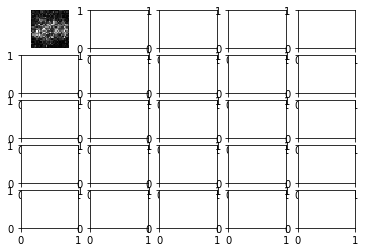

1101 [D loss: 0.709866, acc.: 54.69%] [G loss: 0.907209]
1102 [D loss: 0.569081, acc.: 70.31%] [G loss: 1.067506]
1103 [D loss: 0.603803, acc.: 59.38%] [G loss: 0.940151]
1104 [D loss: 0.577714, acc.: 67.19%] [G loss: 0.919505]
1105 [D loss: 0.595578, acc.: 64.06%] [G loss: 0.868728]
1106 [D loss: 0.596695, acc.: 71.88%] [G loss: 0.966388]
1107 [D loss: 0.635531, acc.: 59.38%] [G loss: 0.967779]
1108 [D loss: 0.578833, acc.: 73.44%] [G loss: 0.925169]
1109 [D loss: 0.620411, acc.: 65.62%] [G loss: 1.005798]
1110 [D loss: 0.678862, acc.: 64.06%] [G loss: 0.845372]
1111 [D loss: 0.585940, acc.: 65.62%] [G loss: 0.830200]
1112 [D loss: 0.565106, acc.: 73.44%] [G loss: 0.938986]
1113 [D loss: 0.559371, acc.: 70.31%] [G loss: 0.967652]
1114 [D loss: 0.624435, acc.: 60.94%] [G loss: 0.831662]
1115 [D loss: 0.596416, acc.: 62.50%] [G loss: 0.864339]
1116 [D loss: 0.599697, acc.: 71.88%] [G loss: 0.913449]
1117 [D loss: 0.538187, acc.: 75.00%] [G loss: 0.939924]
1118 [D loss: 0.672187, acc.: 5

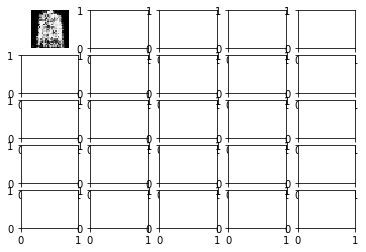

1151 [D loss: 0.607598, acc.: 70.31%] [G loss: 0.991679]
1152 [D loss: 0.616329, acc.: 62.50%] [G loss: 0.914978]
1153 [D loss: 0.580119, acc.: 70.31%] [G loss: 1.039861]
1154 [D loss: 0.516176, acc.: 82.81%] [G loss: 1.093702]
1155 [D loss: 0.682238, acc.: 57.81%] [G loss: 0.851480]
1156 [D loss: 0.624485, acc.: 67.19%] [G loss: 0.967390]
1157 [D loss: 0.617005, acc.: 65.62%] [G loss: 0.851872]
1158 [D loss: 0.583115, acc.: 75.00%] [G loss: 0.942791]
1159 [D loss: 0.533915, acc.: 70.31%] [G loss: 0.894568]
1160 [D loss: 0.663183, acc.: 62.50%] [G loss: 0.940309]
1161 [D loss: 0.553395, acc.: 76.56%] [G loss: 0.904625]
1162 [D loss: 0.623203, acc.: 68.75%] [G loss: 0.916811]
1163 [D loss: 0.590489, acc.: 68.75%] [G loss: 0.884276]
1164 [D loss: 0.633019, acc.: 64.06%] [G loss: 0.922194]
1165 [D loss: 0.589422, acc.: 71.88%] [G loss: 0.957896]
1166 [D loss: 0.588184, acc.: 70.31%] [G loss: 1.048814]
1167 [D loss: 0.559044, acc.: 68.75%] [G loss: 0.962109]
1168 [D loss: 0.557733, acc.: 6

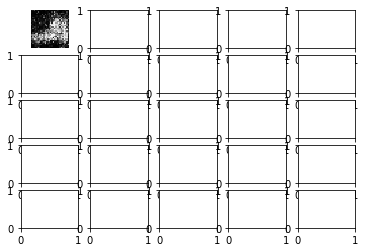

1201 [D loss: 0.581324, acc.: 68.75%] [G loss: 0.890044]
1202 [D loss: 0.616697, acc.: 68.75%] [G loss: 0.894297]
1203 [D loss: 0.618972, acc.: 62.50%] [G loss: 0.935955]
1204 [D loss: 0.592883, acc.: 67.19%] [G loss: 0.900224]
1205 [D loss: 0.652692, acc.: 65.62%] [G loss: 0.845590]
1206 [D loss: 0.641633, acc.: 60.94%] [G loss: 0.930099]
1207 [D loss: 0.596300, acc.: 70.31%] [G loss: 0.839172]
1208 [D loss: 0.606566, acc.: 70.31%] [G loss: 0.935227]
1209 [D loss: 0.559894, acc.: 71.88%] [G loss: 0.865161]
1210 [D loss: 0.681132, acc.: 53.12%] [G loss: 0.969475]
1211 [D loss: 0.588178, acc.: 65.62%] [G loss: 1.009781]
1212 [D loss: 0.555427, acc.: 71.88%] [G loss: 0.953651]
1213 [D loss: 0.556264, acc.: 73.44%] [G loss: 0.946463]
1214 [D loss: 0.580931, acc.: 75.00%] [G loss: 0.894477]
1215 [D loss: 0.667211, acc.: 60.94%] [G loss: 0.953560]
1216 [D loss: 0.591145, acc.: 62.50%] [G loss: 0.971136]
1217 [D loss: 0.634452, acc.: 62.50%] [G loss: 0.889906]
1218 [D loss: 0.633685, acc.: 5

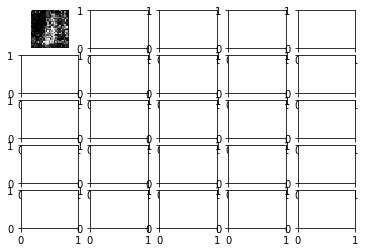

1251 [D loss: 0.577322, acc.: 71.88%] [G loss: 1.014769]
1252 [D loss: 0.634953, acc.: 59.38%] [G loss: 0.920694]
1253 [D loss: 0.674206, acc.: 64.06%] [G loss: 0.952186]
1254 [D loss: 0.636953, acc.: 64.06%] [G loss: 0.887461]
1255 [D loss: 0.581332, acc.: 73.44%] [G loss: 0.966343]
1256 [D loss: 0.661973, acc.: 53.12%] [G loss: 0.870718]
1257 [D loss: 0.623920, acc.: 65.62%] [G loss: 0.875208]
1258 [D loss: 0.633122, acc.: 65.62%] [G loss: 0.847643]
1259 [D loss: 0.553935, acc.: 78.12%] [G loss: 0.913908]
1260 [D loss: 0.648431, acc.: 60.94%] [G loss: 1.023954]
1261 [D loss: 0.640522, acc.: 60.94%] [G loss: 0.950473]
1262 [D loss: 0.601997, acc.: 75.00%] [G loss: 0.967339]
1263 [D loss: 0.666137, acc.: 56.25%] [G loss: 0.920009]
1264 [D loss: 0.615020, acc.: 70.31%] [G loss: 0.824286]
1265 [D loss: 0.631520, acc.: 65.62%] [G loss: 0.865150]
1266 [D loss: 0.584348, acc.: 65.62%] [G loss: 0.855452]
1267 [D loss: 0.641754, acc.: 65.62%] [G loss: 0.880301]
1268 [D loss: 0.626431, acc.: 6

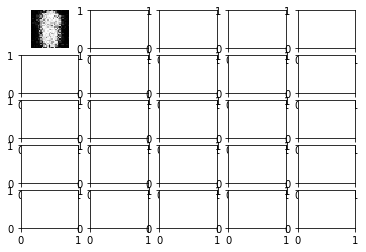

1301 [D loss: 0.683524, acc.: 60.94%] [G loss: 0.893154]
1302 [D loss: 0.631793, acc.: 65.62%] [G loss: 0.874674]
1303 [D loss: 0.588601, acc.: 71.88%] [G loss: 0.894367]
1304 [D loss: 0.621927, acc.: 65.62%] [G loss: 0.919029]
1305 [D loss: 0.607915, acc.: 70.31%] [G loss: 0.934340]
1306 [D loss: 0.602075, acc.: 65.62%] [G loss: 0.911200]
1307 [D loss: 0.677352, acc.: 59.38%] [G loss: 0.920291]
1308 [D loss: 0.614705, acc.: 64.06%] [G loss: 0.868706]
1309 [D loss: 0.706267, acc.: 53.12%] [G loss: 0.824452]
1310 [D loss: 0.581201, acc.: 64.06%] [G loss: 0.829851]
1311 [D loss: 0.600682, acc.: 64.06%] [G loss: 0.825644]
1312 [D loss: 0.601497, acc.: 68.75%] [G loss: 0.842903]
1313 [D loss: 0.600483, acc.: 71.88%] [G loss: 0.935824]
1314 [D loss: 0.669472, acc.: 57.81%] [G loss: 0.981316]
1315 [D loss: 0.634866, acc.: 68.75%] [G loss: 0.988172]
1316 [D loss: 0.609550, acc.: 68.75%] [G loss: 0.952544]
1317 [D loss: 0.579261, acc.: 73.44%] [G loss: 0.897851]
1318 [D loss: 0.601757, acc.: 6

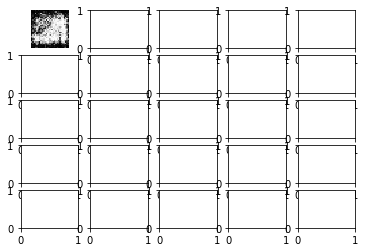

1351 [D loss: 0.633719, acc.: 65.62%] [G loss: 0.898176]
1352 [D loss: 0.598835, acc.: 62.50%] [G loss: 0.890730]
1353 [D loss: 0.600587, acc.: 71.88%] [G loss: 0.922973]
1354 [D loss: 0.551703, acc.: 71.88%] [G loss: 0.888392]
1355 [D loss: 0.615617, acc.: 68.75%] [G loss: 0.965151]
1356 [D loss: 0.626839, acc.: 62.50%] [G loss: 0.853898]
1357 [D loss: 0.562179, acc.: 73.44%] [G loss: 0.901640]
1358 [D loss: 0.631434, acc.: 64.06%] [G loss: 0.981871]
1359 [D loss: 0.636992, acc.: 57.81%] [G loss: 0.904100]
1360 [D loss: 0.588928, acc.: 70.31%] [G loss: 1.015045]
1361 [D loss: 0.601477, acc.: 70.31%] [G loss: 0.891932]
1362 [D loss: 0.572353, acc.: 68.75%] [G loss: 0.982383]
1363 [D loss: 0.592581, acc.: 70.31%] [G loss: 0.868560]
1364 [D loss: 0.660706, acc.: 59.38%] [G loss: 0.844270]
1365 [D loss: 0.642408, acc.: 62.50%] [G loss: 0.930969]
1366 [D loss: 0.585609, acc.: 73.44%] [G loss: 0.934306]
1367 [D loss: 0.632587, acc.: 59.38%] [G loss: 0.889588]
1368 [D loss: 0.597214, acc.: 6

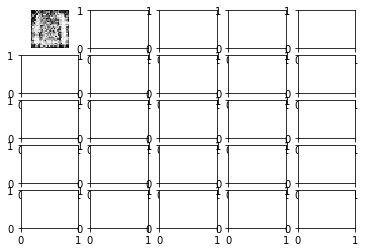

1401 [D loss: 0.582750, acc.: 71.88%] [G loss: 0.792621]
1402 [D loss: 0.582331, acc.: 70.31%] [G loss: 0.805812]
1403 [D loss: 0.559135, acc.: 73.44%] [G loss: 0.849834]
1404 [D loss: 0.619958, acc.: 59.38%] [G loss: 0.830060]
1405 [D loss: 0.625033, acc.: 67.19%] [G loss: 0.816626]
1406 [D loss: 0.588759, acc.: 67.19%] [G loss: 0.907037]
1407 [D loss: 0.592118, acc.: 73.44%] [G loss: 0.991343]
1408 [D loss: 0.580656, acc.: 75.00%] [G loss: 0.964283]
1409 [D loss: 0.553988, acc.: 75.00%] [G loss: 0.887395]
1410 [D loss: 0.581047, acc.: 73.44%] [G loss: 0.991328]
1411 [D loss: 0.595816, acc.: 71.88%] [G loss: 0.863268]
1412 [D loss: 0.524561, acc.: 75.00%] [G loss: 0.883744]
1413 [D loss: 0.662476, acc.: 57.81%] [G loss: 0.895013]
1414 [D loss: 0.623395, acc.: 59.38%] [G loss: 0.842289]
1415 [D loss: 0.596078, acc.: 71.88%] [G loss: 0.925552]
1416 [D loss: 0.572550, acc.: 68.75%] [G loss: 0.879768]
1417 [D loss: 0.571898, acc.: 71.88%] [G loss: 0.919424]
1418 [D loss: 0.556700, acc.: 7

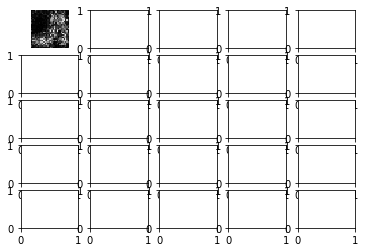

1451 [D loss: 0.608737, acc.: 62.50%] [G loss: 0.864253]
1452 [D loss: 0.627034, acc.: 65.62%] [G loss: 0.951810]
1453 [D loss: 0.549978, acc.: 73.44%] [G loss: 0.862493]
1454 [D loss: 0.592133, acc.: 56.25%] [G loss: 0.955804]
1455 [D loss: 0.605984, acc.: 68.75%] [G loss: 0.939026]
1456 [D loss: 0.638922, acc.: 65.62%] [G loss: 0.932261]
1457 [D loss: 0.625993, acc.: 64.06%] [G loss: 0.941779]
1458 [D loss: 0.665030, acc.: 57.81%] [G loss: 0.834488]
1459 [D loss: 0.512783, acc.: 75.00%] [G loss: 1.025055]
1460 [D loss: 0.464105, acc.: 79.69%] [G loss: 1.004126]
1461 [D loss: 0.594922, acc.: 70.31%] [G loss: 0.929399]
1462 [D loss: 0.559750, acc.: 67.19%] [G loss: 0.962292]
1463 [D loss: 0.657615, acc.: 64.06%] [G loss: 1.048041]
1464 [D loss: 0.652733, acc.: 65.62%] [G loss: 0.935022]
1465 [D loss: 0.587638, acc.: 71.88%] [G loss: 0.978342]
1466 [D loss: 0.624404, acc.: 67.19%] [G loss: 0.939805]
1467 [D loss: 0.639263, acc.: 65.62%] [G loss: 0.873029]
1468 [D loss: 0.628641, acc.: 5

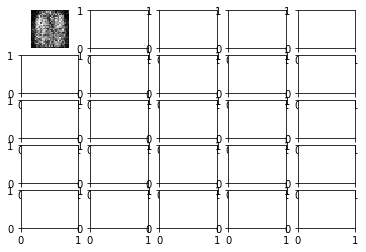

1501 [D loss: 0.601973, acc.: 73.44%] [G loss: 0.997068]
1502 [D loss: 0.593269, acc.: 70.31%] [G loss: 0.931422]
1503 [D loss: 0.657173, acc.: 62.50%] [G loss: 0.966741]
1504 [D loss: 0.700055, acc.: 60.94%] [G loss: 0.954924]
1505 [D loss: 0.525657, acc.: 84.38%] [G loss: 1.021841]
1506 [D loss: 0.628217, acc.: 65.62%] [G loss: 0.909077]
1507 [D loss: 0.622876, acc.: 59.38%] [G loss: 0.851221]
1508 [D loss: 0.635787, acc.: 64.06%] [G loss: 0.935118]
1509 [D loss: 0.509102, acc.: 78.12%] [G loss: 0.914038]
1510 [D loss: 0.603027, acc.: 71.88%] [G loss: 0.840825]
1511 [D loss: 0.656554, acc.: 62.50%] [G loss: 0.806855]
1512 [D loss: 0.589696, acc.: 70.31%] [G loss: 0.915230]
1513 [D loss: 0.650541, acc.: 57.81%] [G loss: 0.977639]
1514 [D loss: 0.664802, acc.: 64.06%] [G loss: 0.952113]
1515 [D loss: 0.681027, acc.: 65.62%] [G loss: 0.918616]
1516 [D loss: 0.680366, acc.: 50.00%] [G loss: 0.875329]
1517 [D loss: 0.614509, acc.: 67.19%] [G loss: 0.948221]
1518 [D loss: 0.586683, acc.: 6

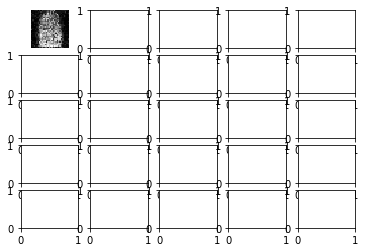

1551 [D loss: 0.622172, acc.: 73.44%] [G loss: 0.948522]
1552 [D loss: 0.655873, acc.: 59.38%] [G loss: 0.961750]
1553 [D loss: 0.529256, acc.: 78.12%] [G loss: 0.942783]
1554 [D loss: 0.648898, acc.: 67.19%] [G loss: 0.908582]
1555 [D loss: 0.650338, acc.: 60.94%] [G loss: 1.003706]
1556 [D loss: 0.616863, acc.: 60.94%] [G loss: 0.924508]
1557 [D loss: 0.582164, acc.: 73.44%] [G loss: 1.016081]
1558 [D loss: 0.588308, acc.: 65.62%] [G loss: 0.940246]
1559 [D loss: 0.615036, acc.: 65.62%] [G loss: 0.957393]
1560 [D loss: 0.555509, acc.: 75.00%] [G loss: 0.948540]
1561 [D loss: 0.624503, acc.: 62.50%] [G loss: 0.865195]
1562 [D loss: 0.584760, acc.: 71.88%] [G loss: 0.916896]
1563 [D loss: 0.561484, acc.: 70.31%] [G loss: 0.856962]
1564 [D loss: 0.664777, acc.: 62.50%] [G loss: 0.917067]
1565 [D loss: 0.631785, acc.: 65.62%] [G loss: 0.902134]
1566 [D loss: 0.652375, acc.: 57.81%] [G loss: 0.948446]
1567 [D loss: 0.592187, acc.: 67.19%] [G loss: 0.925375]
1568 [D loss: 0.600362, acc.: 5

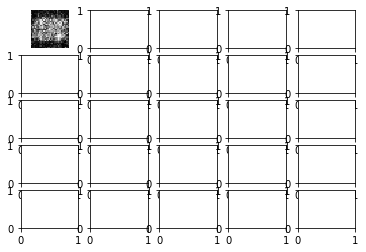

1601 [D loss: 0.591369, acc.: 68.75%] [G loss: 0.880087]
1602 [D loss: 0.618516, acc.: 65.62%] [G loss: 0.776543]
1603 [D loss: 0.591791, acc.: 75.00%] [G loss: 0.892803]
1604 [D loss: 0.559255, acc.: 71.88%] [G loss: 0.959461]
1605 [D loss: 0.578607, acc.: 67.19%] [G loss: 0.891609]
1606 [D loss: 0.598043, acc.: 67.19%] [G loss: 0.983302]
1607 [D loss: 0.686554, acc.: 60.94%] [G loss: 0.889857]
1608 [D loss: 0.639299, acc.: 60.94%] [G loss: 0.976571]
1609 [D loss: 0.626605, acc.: 68.75%] [G loss: 0.977136]
1610 [D loss: 0.608664, acc.: 62.50%] [G loss: 0.933798]
1611 [D loss: 0.574961, acc.: 68.75%] [G loss: 0.928042]
1612 [D loss: 0.622141, acc.: 64.06%] [G loss: 0.786985]
1613 [D loss: 0.613326, acc.: 68.75%] [G loss: 0.846085]
1614 [D loss: 0.557770, acc.: 71.88%] [G loss: 0.949447]
1615 [D loss: 0.594271, acc.: 73.44%] [G loss: 0.852365]
1616 [D loss: 0.623116, acc.: 62.50%] [G loss: 0.922067]
1617 [D loss: 0.597524, acc.: 73.44%] [G loss: 0.882451]
1618 [D loss: 0.581101, acc.: 6

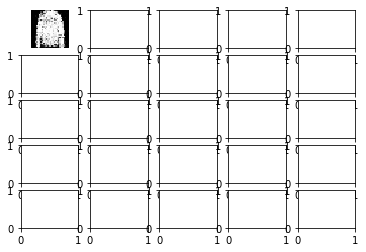

1651 [D loss: 0.628601, acc.: 54.69%] [G loss: 0.921693]
1652 [D loss: 0.542197, acc.: 78.12%] [G loss: 0.931919]
1653 [D loss: 0.694038, acc.: 53.12%] [G loss: 0.882192]
1654 [D loss: 0.715197, acc.: 50.00%] [G loss: 0.966326]
1655 [D loss: 0.589617, acc.: 64.06%] [G loss: 0.997909]
1656 [D loss: 0.627867, acc.: 65.62%] [G loss: 0.900688]
1657 [D loss: 0.629315, acc.: 59.38%] [G loss: 0.869917]
1658 [D loss: 0.616303, acc.: 62.50%] [G loss: 0.857556]
1659 [D loss: 0.600967, acc.: 68.75%] [G loss: 0.908633]
1660 [D loss: 0.609537, acc.: 73.44%] [G loss: 0.954991]
1661 [D loss: 0.672101, acc.: 59.38%] [G loss: 0.952282]
1662 [D loss: 0.581964, acc.: 64.06%] [G loss: 0.929553]
1663 [D loss: 0.583141, acc.: 73.44%] [G loss: 0.885357]
1664 [D loss: 0.566847, acc.: 71.88%] [G loss: 0.950863]
1665 [D loss: 0.606772, acc.: 62.50%] [G loss: 0.897563]
1666 [D loss: 0.675448, acc.: 57.81%] [G loss: 0.828703]
1667 [D loss: 0.595323, acc.: 70.31%] [G loss: 0.903414]
1668 [D loss: 0.657216, acc.: 6

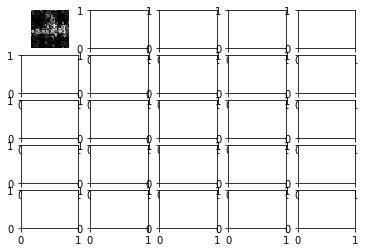

1701 [D loss: 0.608763, acc.: 68.75%] [G loss: 0.937930]
1702 [D loss: 0.614852, acc.: 71.88%] [G loss: 0.897756]
1703 [D loss: 0.663807, acc.: 57.81%] [G loss: 0.894439]
1704 [D loss: 0.591945, acc.: 65.62%] [G loss: 0.953202]
1705 [D loss: 0.625814, acc.: 60.94%] [G loss: 0.937276]
1706 [D loss: 0.637170, acc.: 64.06%] [G loss: 0.831707]
1707 [D loss: 0.573719, acc.: 71.88%] [G loss: 0.903555]
1708 [D loss: 0.662164, acc.: 54.69%] [G loss: 0.880489]
1709 [D loss: 0.555071, acc.: 75.00%] [G loss: 0.878136]
1710 [D loss: 0.618518, acc.: 68.75%] [G loss: 0.853165]
1711 [D loss: 0.658851, acc.: 57.81%] [G loss: 0.870847]
1712 [D loss: 0.582758, acc.: 65.62%] [G loss: 0.853723]
1713 [D loss: 0.633517, acc.: 67.19%] [G loss: 0.870443]
1714 [D loss: 0.686481, acc.: 51.56%] [G loss: 0.916297]
1715 [D loss: 0.576856, acc.: 70.31%] [G loss: 0.927722]
1716 [D loss: 0.614265, acc.: 70.31%] [G loss: 1.054415]
1717 [D loss: 0.639795, acc.: 65.62%] [G loss: 1.025364]
1718 [D loss: 0.619311, acc.: 6

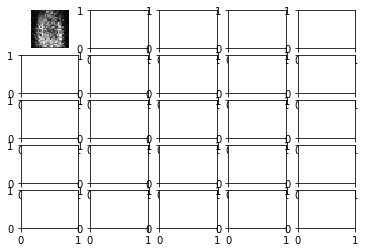

1751 [D loss: 0.631562, acc.: 62.50%] [G loss: 0.895899]
1752 [D loss: 0.668299, acc.: 64.06%] [G loss: 0.873386]
1753 [D loss: 0.638541, acc.: 60.94%] [G loss: 0.893645]
1754 [D loss: 0.626171, acc.: 64.06%] [G loss: 0.887133]
1755 [D loss: 0.584049, acc.: 67.19%] [G loss: 0.984399]
1756 [D loss: 0.584909, acc.: 71.88%] [G loss: 1.067393]
1757 [D loss: 0.644105, acc.: 67.19%] [G loss: 0.915384]
1758 [D loss: 0.692706, acc.: 54.69%] [G loss: 0.925959]
1759 [D loss: 0.592559, acc.: 76.56%] [G loss: 0.950458]
1760 [D loss: 0.590999, acc.: 70.31%] [G loss: 0.971729]
1761 [D loss: 0.558644, acc.: 76.56%] [G loss: 0.913200]
1762 [D loss: 0.671020, acc.: 62.50%] [G loss: 0.973705]
1763 [D loss: 0.596247, acc.: 73.44%] [G loss: 0.933445]
1764 [D loss: 0.571841, acc.: 71.88%] [G loss: 0.989883]
1765 [D loss: 0.669138, acc.: 53.12%] [G loss: 0.960248]
1766 [D loss: 0.532923, acc.: 75.00%] [G loss: 1.040988]
1767 [D loss: 0.631602, acc.: 65.62%] [G loss: 0.980696]
1768 [D loss: 0.539784, acc.: 7

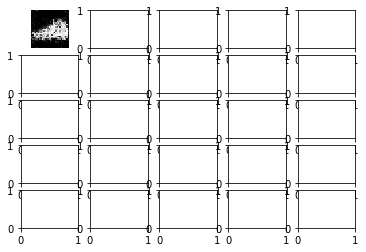

1801 [D loss: 0.599173, acc.: 70.31%] [G loss: 0.909707]
1802 [D loss: 0.641212, acc.: 62.50%] [G loss: 1.011086]
1803 [D loss: 0.624321, acc.: 65.62%] [G loss: 0.927547]
1804 [D loss: 0.640764, acc.: 62.50%] [G loss: 0.877337]
1805 [D loss: 0.621473, acc.: 62.50%] [G loss: 0.969660]
1806 [D loss: 0.612020, acc.: 67.19%] [G loss: 0.810593]
1807 [D loss: 0.573508, acc.: 70.31%] [G loss: 0.890390]
1808 [D loss: 0.617698, acc.: 67.19%] [G loss: 0.923403]
1809 [D loss: 0.543291, acc.: 75.00%] [G loss: 0.959726]
1810 [D loss: 0.675586, acc.: 56.25%] [G loss: 0.924142]
1811 [D loss: 0.585218, acc.: 73.44%] [G loss: 0.879385]
1812 [D loss: 0.607111, acc.: 68.75%] [G loss: 0.905264]
1813 [D loss: 0.652723, acc.: 64.06%] [G loss: 0.931460]
1814 [D loss: 0.587365, acc.: 71.88%] [G loss: 0.994583]
1815 [D loss: 0.601460, acc.: 70.31%] [G loss: 0.839412]
1816 [D loss: 0.649470, acc.: 60.94%] [G loss: 0.917533]
1817 [D loss: 0.609237, acc.: 64.06%] [G loss: 0.890125]
1818 [D loss: 0.579563, acc.: 7

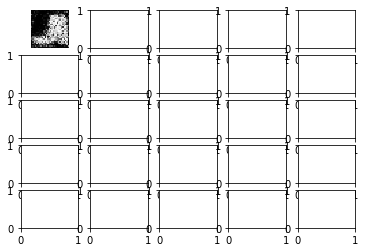

1851 [D loss: 0.561028, acc.: 76.56%] [G loss: 0.912749]
1852 [D loss: 0.618609, acc.: 65.62%] [G loss: 0.936819]
1853 [D loss: 0.576564, acc.: 76.56%] [G loss: 0.931014]
1854 [D loss: 0.627086, acc.: 65.62%] [G loss: 0.908821]
1855 [D loss: 0.723243, acc.: 46.88%] [G loss: 0.891778]
1856 [D loss: 0.597992, acc.: 70.31%] [G loss: 0.909411]
1857 [D loss: 0.641590, acc.: 56.25%] [G loss: 0.790740]
1858 [D loss: 0.675266, acc.: 54.69%] [G loss: 0.847839]
1859 [D loss: 0.646637, acc.: 57.81%] [G loss: 0.886423]
1860 [D loss: 0.613735, acc.: 67.19%] [G loss: 0.907995]
1861 [D loss: 0.572692, acc.: 70.31%] [G loss: 0.966003]
1862 [D loss: 0.603737, acc.: 67.19%] [G loss: 1.015440]
1863 [D loss: 0.645741, acc.: 53.12%] [G loss: 0.974830]
1864 [D loss: 0.575543, acc.: 73.44%] [G loss: 0.999690]
1865 [D loss: 0.617975, acc.: 68.75%] [G loss: 0.889432]
1866 [D loss: 0.589574, acc.: 81.25%] [G loss: 0.926385]
1867 [D loss: 0.560415, acc.: 68.75%] [G loss: 0.925969]
1868 [D loss: 0.649381, acc.: 5

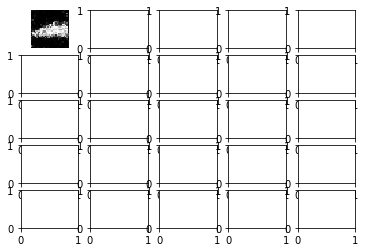

1901 [D loss: 0.583787, acc.: 68.75%] [G loss: 0.865455]
1902 [D loss: 0.613139, acc.: 68.75%] [G loss: 0.948637]
1903 [D loss: 0.600045, acc.: 67.19%] [G loss: 1.023618]
1904 [D loss: 0.620574, acc.: 68.75%] [G loss: 0.957704]
1905 [D loss: 0.620892, acc.: 65.62%] [G loss: 1.002147]
1906 [D loss: 0.669219, acc.: 56.25%] [G loss: 0.940435]
1907 [D loss: 0.570857, acc.: 75.00%] [G loss: 0.977741]
1908 [D loss: 0.608774, acc.: 71.88%] [G loss: 1.046257]
1909 [D loss: 0.640244, acc.: 68.75%] [G loss: 0.938635]
1910 [D loss: 0.535300, acc.: 79.69%] [G loss: 1.054453]
1911 [D loss: 0.659286, acc.: 62.50%] [G loss: 0.877654]
1912 [D loss: 0.607656, acc.: 65.62%] [G loss: 0.843558]
1913 [D loss: 0.637187, acc.: 60.94%] [G loss: 0.953578]
1914 [D loss: 0.559070, acc.: 78.12%] [G loss: 0.963762]
1915 [D loss: 0.630000, acc.: 68.75%] [G loss: 0.972948]
1916 [D loss: 0.580643, acc.: 75.00%] [G loss: 0.882000]
1917 [D loss: 0.600733, acc.: 67.19%] [G loss: 0.928180]
1918 [D loss: 0.667318, acc.: 5

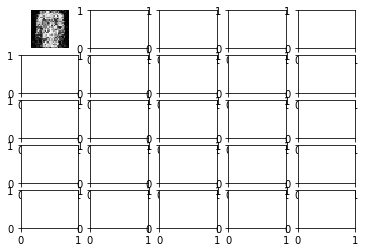

1951 [D loss: 0.629201, acc.: 68.75%] [G loss: 0.877187]
1952 [D loss: 0.685023, acc.: 62.50%] [G loss: 0.859642]
1953 [D loss: 0.600442, acc.: 71.88%] [G loss: 0.963235]
1954 [D loss: 0.613432, acc.: 70.31%] [G loss: 0.936566]
1955 [D loss: 0.649284, acc.: 62.50%] [G loss: 0.963312]
1956 [D loss: 0.642909, acc.: 68.75%] [G loss: 0.883657]
1957 [D loss: 0.659483, acc.: 57.81%] [G loss: 0.780901]
1958 [D loss: 0.658083, acc.: 62.50%] [G loss: 0.841549]
1959 [D loss: 0.579180, acc.: 68.75%] [G loss: 0.983604]
1960 [D loss: 0.621050, acc.: 67.19%] [G loss: 0.957251]
1961 [D loss: 0.602721, acc.: 60.94%] [G loss: 0.914424]
1962 [D loss: 0.594012, acc.: 71.88%] [G loss: 0.916028]
1963 [D loss: 0.660951, acc.: 57.81%] [G loss: 0.987146]
1964 [D loss: 0.530738, acc.: 70.31%] [G loss: 0.866412]
1965 [D loss: 0.643509, acc.: 60.94%] [G loss: 0.852719]
1966 [D loss: 0.656420, acc.: 60.94%] [G loss: 0.959515]
1967 [D loss: 0.601319, acc.: 65.62%] [G loss: 1.000311]
1968 [D loss: 0.587617, acc.: 6

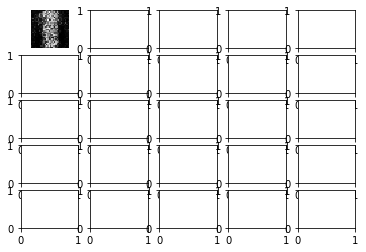

2001 [D loss: 0.596682, acc.: 68.75%] [G loss: 0.841081]
2002 [D loss: 0.558673, acc.: 70.31%] [G loss: 0.930629]
2003 [D loss: 0.582801, acc.: 68.75%] [G loss: 0.991022]
2004 [D loss: 0.639996, acc.: 60.94%] [G loss: 0.938157]
2005 [D loss: 0.635062, acc.: 62.50%] [G loss: 0.897530]
2006 [D loss: 0.627680, acc.: 67.19%] [G loss: 0.919639]
2007 [D loss: 0.619935, acc.: 67.19%] [G loss: 0.948571]
2008 [D loss: 0.578290, acc.: 68.75%] [G loss: 1.005058]
2009 [D loss: 0.604273, acc.: 67.19%] [G loss: 0.983100]
2010 [D loss: 0.571019, acc.: 76.56%] [G loss: 1.038974]
2011 [D loss: 0.601564, acc.: 65.62%] [G loss: 0.973869]
2012 [D loss: 0.646497, acc.: 64.06%] [G loss: 0.955425]
2013 [D loss: 0.650637, acc.: 56.25%] [G loss: 0.968238]
2014 [D loss: 0.646003, acc.: 62.50%] [G loss: 0.885027]
2015 [D loss: 0.612152, acc.: 64.06%] [G loss: 0.981344]
2016 [D loss: 0.571044, acc.: 76.56%] [G loss: 0.946519]
2017 [D loss: 0.589958, acc.: 71.88%] [G loss: 0.861880]
2018 [D loss: 0.575184, acc.: 7

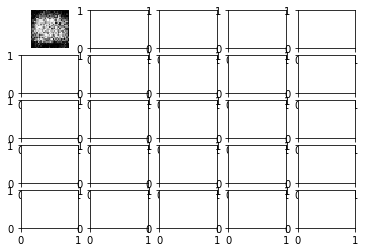

2051 [D loss: 0.603178, acc.: 68.75%] [G loss: 0.903972]
2052 [D loss: 0.618578, acc.: 68.75%] [G loss: 0.983718]
2053 [D loss: 0.617913, acc.: 65.62%] [G loss: 0.866667]
2054 [D loss: 0.620001, acc.: 60.94%] [G loss: 0.882338]
2055 [D loss: 0.668724, acc.: 51.56%] [G loss: 0.882954]
2056 [D loss: 0.679212, acc.: 57.81%] [G loss: 0.993604]
2057 [D loss: 0.582339, acc.: 70.31%] [G loss: 0.930669]
2058 [D loss: 0.581865, acc.: 70.31%] [G loss: 0.882955]
2059 [D loss: 0.639878, acc.: 70.31%] [G loss: 0.827057]
2060 [D loss: 0.610100, acc.: 65.62%] [G loss: 0.917030]
2061 [D loss: 0.598374, acc.: 68.75%] [G loss: 0.837831]
2062 [D loss: 0.586310, acc.: 76.56%] [G loss: 0.890642]
2063 [D loss: 0.664380, acc.: 54.69%] [G loss: 0.917346]
2064 [D loss: 0.631981, acc.: 56.25%] [G loss: 0.914386]
2065 [D loss: 0.627966, acc.: 70.31%] [G loss: 0.855253]
2066 [D loss: 0.611828, acc.: 68.75%] [G loss: 0.908293]
2067 [D loss: 0.630648, acc.: 65.62%] [G loss: 0.959277]
2068 [D loss: 0.616106, acc.: 6

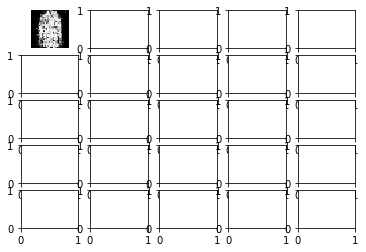

2101 [D loss: 0.605923, acc.: 71.88%] [G loss: 0.948746]
2102 [D loss: 0.610526, acc.: 68.75%] [G loss: 0.875810]
2103 [D loss: 0.578153, acc.: 76.56%] [G loss: 0.959853]
2104 [D loss: 0.628641, acc.: 62.50%] [G loss: 0.937505]
2105 [D loss: 0.596240, acc.: 71.88%] [G loss: 0.877890]
2106 [D loss: 0.605655, acc.: 70.31%] [G loss: 0.793340]
2107 [D loss: 0.671764, acc.: 59.38%] [G loss: 0.903358]
2108 [D loss: 0.637633, acc.: 67.19%] [G loss: 0.809000]
2109 [D loss: 0.623847, acc.: 67.19%] [G loss: 0.981033]
2110 [D loss: 0.633614, acc.: 60.94%] [G loss: 1.072110]
2111 [D loss: 0.678818, acc.: 54.69%] [G loss: 0.984353]
2112 [D loss: 0.569353, acc.: 67.19%] [G loss: 0.883183]
2113 [D loss: 0.634467, acc.: 60.94%] [G loss: 0.888209]
2114 [D loss: 0.612713, acc.: 62.50%] [G loss: 0.949005]
2115 [D loss: 0.613679, acc.: 56.25%] [G loss: 0.888403]
2116 [D loss: 0.656030, acc.: 68.75%] [G loss: 0.840240]
2117 [D loss: 0.624963, acc.: 62.50%] [G loss: 0.837322]
2118 [D loss: 0.589978, acc.: 6

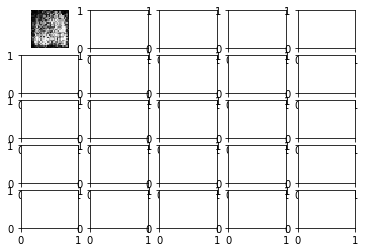

2151 [D loss: 0.607450, acc.: 73.44%] [G loss: 1.002427]
2152 [D loss: 0.641276, acc.: 60.94%] [G loss: 0.823727]
2153 [D loss: 0.649098, acc.: 65.62%] [G loss: 0.865932]
2154 [D loss: 0.655332, acc.: 62.50%] [G loss: 0.972512]
2155 [D loss: 0.583777, acc.: 65.62%] [G loss: 0.862100]
2156 [D loss: 0.592811, acc.: 68.75%] [G loss: 0.859758]
2157 [D loss: 0.584957, acc.: 65.62%] [G loss: 0.914414]
2158 [D loss: 0.627273, acc.: 64.06%] [G loss: 0.919548]
2159 [D loss: 0.635136, acc.: 64.06%] [G loss: 0.890011]
2160 [D loss: 0.658466, acc.: 60.94%] [G loss: 0.961347]
2161 [D loss: 0.571179, acc.: 75.00%] [G loss: 0.973916]
2162 [D loss: 0.636746, acc.: 64.06%] [G loss: 0.982810]
2163 [D loss: 0.595184, acc.: 65.62%] [G loss: 0.942493]
2164 [D loss: 0.621251, acc.: 70.31%] [G loss: 0.931135]
2165 [D loss: 0.647419, acc.: 64.06%] [G loss: 0.834742]
2166 [D loss: 0.535528, acc.: 79.69%] [G loss: 0.927467]
2167 [D loss: 0.659796, acc.: 62.50%] [G loss: 0.906001]
2168 [D loss: 0.623252, acc.: 5

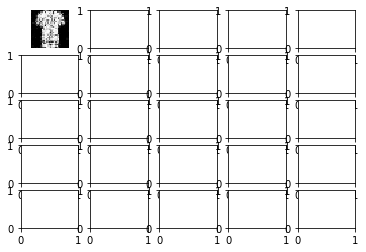

2201 [D loss: 0.687208, acc.: 59.38%] [G loss: 0.968971]
2202 [D loss: 0.729880, acc.: 42.19%] [G loss: 0.868965]
2203 [D loss: 0.614909, acc.: 67.19%] [G loss: 0.889081]
2204 [D loss: 0.683797, acc.: 53.12%] [G loss: 0.925048]
2205 [D loss: 0.592257, acc.: 65.62%] [G loss: 0.939453]
2206 [D loss: 0.638290, acc.: 62.50%] [G loss: 0.981389]
2207 [D loss: 0.633109, acc.: 64.06%] [G loss: 0.967466]
2208 [D loss: 0.674485, acc.: 57.81%] [G loss: 0.960443]
2209 [D loss: 0.580222, acc.: 68.75%] [G loss: 0.824947]
2210 [D loss: 0.625731, acc.: 65.62%] [G loss: 0.907625]
2211 [D loss: 0.631993, acc.: 70.31%] [G loss: 0.923292]
2212 [D loss: 0.669329, acc.: 54.69%] [G loss: 0.980243]
2213 [D loss: 0.604092, acc.: 76.56%] [G loss: 0.936923]
2214 [D loss: 0.631428, acc.: 71.88%] [G loss: 1.021521]
2215 [D loss: 0.647316, acc.: 67.19%] [G loss: 0.917724]
2216 [D loss: 0.633876, acc.: 68.75%] [G loss: 1.038892]
2217 [D loss: 0.643513, acc.: 67.19%] [G loss: 0.945320]
2218 [D loss: 0.621186, acc.: 6

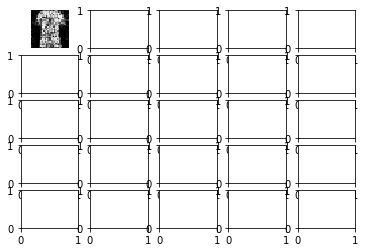

2251 [D loss: 0.656623, acc.: 60.94%] [G loss: 0.959221]
2252 [D loss: 0.663160, acc.: 54.69%] [G loss: 0.902034]
2253 [D loss: 0.670914, acc.: 57.81%] [G loss: 0.995427]
2254 [D loss: 0.616277, acc.: 65.62%] [G loss: 1.025729]
2255 [D loss: 0.588843, acc.: 75.00%] [G loss: 0.903964]
2256 [D loss: 0.626535, acc.: 60.94%] [G loss: 0.920061]
2257 [D loss: 0.653809, acc.: 67.19%] [G loss: 1.042065]
2258 [D loss: 0.570152, acc.: 65.62%] [G loss: 0.946211]
2259 [D loss: 0.681423, acc.: 56.25%] [G loss: 0.921780]
2260 [D loss: 0.584335, acc.: 76.56%] [G loss: 0.882349]
2261 [D loss: 0.636517, acc.: 64.06%] [G loss: 0.878250]
2262 [D loss: 0.554635, acc.: 73.44%] [G loss: 0.894277]
2263 [D loss: 0.600260, acc.: 60.94%] [G loss: 0.938694]
2264 [D loss: 0.612870, acc.: 70.31%] [G loss: 0.894702]
2265 [D loss: 0.627960, acc.: 64.06%] [G loss: 0.906948]
2266 [D loss: 0.622426, acc.: 65.62%] [G loss: 0.885884]
2267 [D loss: 0.634308, acc.: 67.19%] [G loss: 0.862544]
2268 [D loss: 0.616551, acc.: 7

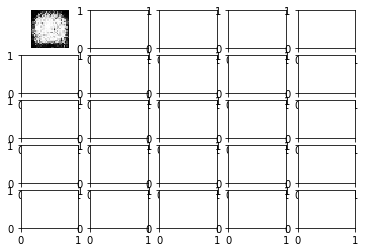

2301 [D loss: 0.681692, acc.: 64.06%] [G loss: 0.937211]
2302 [D loss: 0.596035, acc.: 68.75%] [G loss: 0.964033]
2303 [D loss: 0.605888, acc.: 65.62%] [G loss: 0.968315]
2304 [D loss: 0.646892, acc.: 65.62%] [G loss: 1.008052]
2305 [D loss: 0.568219, acc.: 65.62%] [G loss: 0.942485]
2306 [D loss: 0.672201, acc.: 60.94%] [G loss: 0.874326]
2307 [D loss: 0.604690, acc.: 68.75%] [G loss: 0.981529]
2308 [D loss: 0.634172, acc.: 68.75%] [G loss: 0.948819]
2309 [D loss: 0.683237, acc.: 64.06%] [G loss: 1.030383]
2310 [D loss: 0.626027, acc.: 68.75%] [G loss: 0.915331]
2311 [D loss: 0.647156, acc.: 57.81%] [G loss: 0.961618]
2312 [D loss: 0.605042, acc.: 70.31%] [G loss: 1.012457]
2313 [D loss: 0.602921, acc.: 70.31%] [G loss: 0.927931]
2314 [D loss: 0.720693, acc.: 54.69%] [G loss: 0.809535]
2315 [D loss: 0.573200, acc.: 65.62%] [G loss: 0.972159]
2316 [D loss: 0.570840, acc.: 75.00%] [G loss: 0.879439]
2317 [D loss: 0.536360, acc.: 70.31%] [G loss: 0.994512]
2318 [D loss: 0.550738, acc.: 7

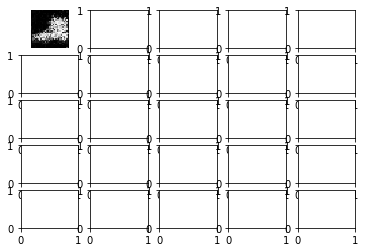

2351 [D loss: 0.551933, acc.: 78.12%] [G loss: 1.008046]
2352 [D loss: 0.716930, acc.: 45.31%] [G loss: 0.917236]
2353 [D loss: 0.627558, acc.: 67.19%] [G loss: 0.853875]
2354 [D loss: 0.606143, acc.: 70.31%] [G loss: 0.909965]
2355 [D loss: 0.623886, acc.: 60.94%] [G loss: 0.922282]
2356 [D loss: 0.593969, acc.: 71.88%] [G loss: 0.821625]
2357 [D loss: 0.637084, acc.: 62.50%] [G loss: 0.891573]
2358 [D loss: 0.587908, acc.: 68.75%] [G loss: 0.925069]
2359 [D loss: 0.666093, acc.: 57.81%] [G loss: 0.859445]
2360 [D loss: 0.646874, acc.: 53.12%] [G loss: 0.974345]
2361 [D loss: 0.587184, acc.: 71.88%] [G loss: 0.894355]
2362 [D loss: 0.664375, acc.: 60.94%] [G loss: 0.853584]
2363 [D loss: 0.627802, acc.: 64.06%] [G loss: 0.894493]
2364 [D loss: 0.611764, acc.: 62.50%] [G loss: 0.926652]
2365 [D loss: 0.556305, acc.: 78.12%] [G loss: 0.883299]
2366 [D loss: 0.623380, acc.: 68.75%] [G loss: 1.014450]
2367 [D loss: 0.723797, acc.: 53.12%] [G loss: 0.947625]
2368 [D loss: 0.561951, acc.: 7

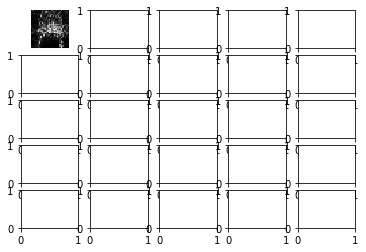

2401 [D loss: 0.647296, acc.: 53.12%] [G loss: 0.875060]
2402 [D loss: 0.650671, acc.: 59.38%] [G loss: 0.958610]
2403 [D loss: 0.643511, acc.: 62.50%] [G loss: 0.924417]
2404 [D loss: 0.623063, acc.: 65.62%] [G loss: 0.874568]
2405 [D loss: 0.612975, acc.: 65.62%] [G loss: 0.973761]
2406 [D loss: 0.589468, acc.: 75.00%] [G loss: 0.887014]
2407 [D loss: 0.595992, acc.: 65.62%] [G loss: 0.906197]
2408 [D loss: 0.563087, acc.: 73.44%] [G loss: 0.977995]
2409 [D loss: 0.600360, acc.: 67.19%] [G loss: 0.874344]
2410 [D loss: 0.684035, acc.: 59.38%] [G loss: 0.813636]
2411 [D loss: 0.602277, acc.: 71.88%] [G loss: 0.889157]
2412 [D loss: 0.586123, acc.: 68.75%] [G loss: 0.886528]
2413 [D loss: 0.636038, acc.: 64.06%] [G loss: 0.932550]
2414 [D loss: 0.666375, acc.: 60.94%] [G loss: 0.878778]
2415 [D loss: 0.597448, acc.: 70.31%] [G loss: 0.953393]
2416 [D loss: 0.560325, acc.: 73.44%] [G loss: 0.800132]
2417 [D loss: 0.566433, acc.: 71.88%] [G loss: 0.915781]
2418 [D loss: 0.518897, acc.: 7

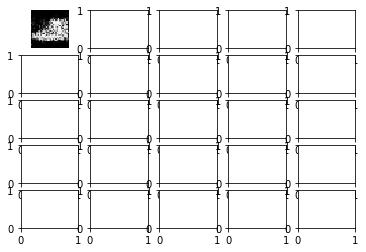

2451 [D loss: 0.605613, acc.: 64.06%] [G loss: 0.892137]
2452 [D loss: 0.601382, acc.: 67.19%] [G loss: 0.868590]
2453 [D loss: 0.703392, acc.: 56.25%] [G loss: 0.848436]
2454 [D loss: 0.655994, acc.: 67.19%] [G loss: 0.997927]
2455 [D loss: 0.637606, acc.: 59.38%] [G loss: 0.954454]
2456 [D loss: 0.610811, acc.: 67.19%] [G loss: 1.007206]
2457 [D loss: 0.656560, acc.: 60.94%] [G loss: 1.041870]
2458 [D loss: 0.626296, acc.: 71.88%] [G loss: 0.978300]
2459 [D loss: 0.600861, acc.: 60.94%] [G loss: 1.054556]
2460 [D loss: 0.708462, acc.: 56.25%] [G loss: 0.852885]
2461 [D loss: 0.617710, acc.: 64.06%] [G loss: 0.859646]
2462 [D loss: 0.617723, acc.: 67.19%] [G loss: 0.888208]
2463 [D loss: 0.639631, acc.: 62.50%] [G loss: 0.978620]
2464 [D loss: 0.575334, acc.: 71.88%] [G loss: 0.900917]
2465 [D loss: 0.677026, acc.: 59.38%] [G loss: 0.940549]
2466 [D loss: 0.632092, acc.: 60.94%] [G loss: 0.864513]
2467 [D loss: 0.605970, acc.: 71.88%] [G loss: 0.904131]
2468 [D loss: 0.614063, acc.: 6

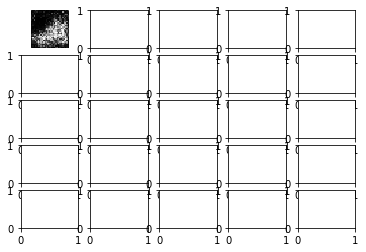

2501 [D loss: 0.657804, acc.: 60.94%] [G loss: 0.983740]
2502 [D loss: 0.582068, acc.: 73.44%] [G loss: 0.969176]
2503 [D loss: 0.613869, acc.: 70.31%] [G loss: 0.947150]
2504 [D loss: 0.603015, acc.: 65.62%] [G loss: 0.939228]
2505 [D loss: 0.630932, acc.: 62.50%] [G loss: 0.920558]
2506 [D loss: 0.603474, acc.: 68.75%] [G loss: 0.829384]
2507 [D loss: 0.528069, acc.: 78.12%] [G loss: 0.891016]
2508 [D loss: 0.623408, acc.: 62.50%] [G loss: 0.878116]
2509 [D loss: 0.619523, acc.: 64.06%] [G loss: 0.919674]
2510 [D loss: 0.624557, acc.: 60.94%] [G loss: 0.874544]
2511 [D loss: 0.637075, acc.: 59.38%] [G loss: 0.930695]
2512 [D loss: 0.633109, acc.: 62.50%] [G loss: 0.950886]
2513 [D loss: 0.649313, acc.: 56.25%] [G loss: 0.963251]
2514 [D loss: 0.719044, acc.: 45.31%] [G loss: 1.035807]
2515 [D loss: 0.587046, acc.: 73.44%] [G loss: 0.904208]
2516 [D loss: 0.600316, acc.: 71.88%] [G loss: 0.935193]
2517 [D loss: 0.660565, acc.: 57.81%] [G loss: 0.876229]
2518 [D loss: 0.587024, acc.: 6

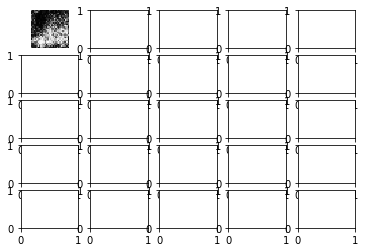

2551 [D loss: 0.613959, acc.: 65.62%] [G loss: 0.948308]
2552 [D loss: 0.674183, acc.: 54.69%] [G loss: 0.895019]
2553 [D loss: 0.660082, acc.: 59.38%] [G loss: 1.047996]
2554 [D loss: 0.622003, acc.: 60.94%] [G loss: 1.011812]
2555 [D loss: 0.648987, acc.: 59.38%] [G loss: 0.921129]
2556 [D loss: 0.652762, acc.: 56.25%] [G loss: 0.954151]
2557 [D loss: 0.618421, acc.: 68.75%] [G loss: 0.986987]
2558 [D loss: 0.613020, acc.: 70.31%] [G loss: 0.971123]
2559 [D loss: 0.628923, acc.: 65.62%] [G loss: 0.940454]
2560 [D loss: 0.665585, acc.: 65.62%] [G loss: 1.054496]
2561 [D loss: 0.622220, acc.: 60.94%] [G loss: 1.087329]
2562 [D loss: 0.604994, acc.: 68.75%] [G loss: 0.987449]
2563 [D loss: 0.603505, acc.: 62.50%] [G loss: 0.933000]
2564 [D loss: 0.654927, acc.: 57.81%] [G loss: 0.848568]
2565 [D loss: 0.587292, acc.: 73.44%] [G loss: 0.847664]
2566 [D loss: 0.596407, acc.: 68.75%] [G loss: 0.837828]
2567 [D loss: 0.605370, acc.: 68.75%] [G loss: 0.918149]
2568 [D loss: 0.599746, acc.: 7

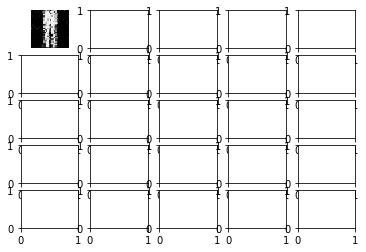

2601 [D loss: 0.557349, acc.: 78.12%] [G loss: 1.018786]
2602 [D loss: 0.670749, acc.: 60.94%] [G loss: 0.983574]
2603 [D loss: 0.634953, acc.: 62.50%] [G loss: 0.932216]
2604 [D loss: 0.667359, acc.: 60.94%] [G loss: 0.816060]
2605 [D loss: 0.625919, acc.: 64.06%] [G loss: 0.850992]
2606 [D loss: 0.546506, acc.: 76.56%] [G loss: 0.923711]
2607 [D loss: 0.631156, acc.: 62.50%] [G loss: 0.896696]
2608 [D loss: 0.628799, acc.: 67.19%] [G loss: 0.940189]
2609 [D loss: 0.617869, acc.: 68.75%] [G loss: 0.901177]
2610 [D loss: 0.662773, acc.: 60.94%] [G loss: 0.870808]
2611 [D loss: 0.556229, acc.: 73.44%] [G loss: 0.891488]
2612 [D loss: 0.589453, acc.: 62.50%] [G loss: 0.846368]
2613 [D loss: 0.562156, acc.: 73.44%] [G loss: 0.963012]
2614 [D loss: 0.599599, acc.: 60.94%] [G loss: 0.991303]
2615 [D loss: 0.655803, acc.: 67.19%] [G loss: 0.922226]
2616 [D loss: 0.586874, acc.: 67.19%] [G loss: 0.854301]
2617 [D loss: 0.544719, acc.: 70.31%] [G loss: 0.953400]
2618 [D loss: 0.663404, acc.: 5

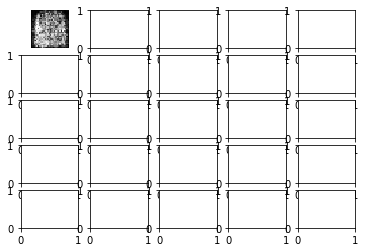

2651 [D loss: 0.613545, acc.: 64.06%] [G loss: 0.911543]
2652 [D loss: 0.575749, acc.: 73.44%] [G loss: 0.990526]
2653 [D loss: 0.620950, acc.: 65.62%] [G loss: 0.990549]
2654 [D loss: 0.635004, acc.: 67.19%] [G loss: 1.007417]
2655 [D loss: 0.637754, acc.: 67.19%] [G loss: 0.947275]
2656 [D loss: 0.622435, acc.: 60.94%] [G loss: 0.882671]
2657 [D loss: 0.625914, acc.: 64.06%] [G loss: 0.844974]
2658 [D loss: 0.576293, acc.: 68.75%] [G loss: 0.845042]
2659 [D loss: 0.718679, acc.: 54.69%] [G loss: 0.935129]
2660 [D loss: 0.687659, acc.: 57.81%] [G loss: 0.895077]
2661 [D loss: 0.590315, acc.: 70.31%] [G loss: 0.944926]
2662 [D loss: 0.612658, acc.: 68.75%] [G loss: 0.878245]
2663 [D loss: 0.638727, acc.: 62.50%] [G loss: 0.914320]
2664 [D loss: 0.642324, acc.: 56.25%] [G loss: 0.900754]
2665 [D loss: 0.637411, acc.: 57.81%] [G loss: 0.980340]
2666 [D loss: 0.570853, acc.: 71.88%] [G loss: 1.011248]
2667 [D loss: 0.609103, acc.: 60.94%] [G loss: 0.884161]
2668 [D loss: 0.701860, acc.: 5

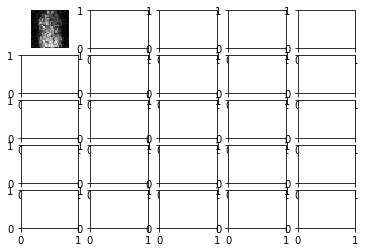

2701 [D loss: 0.594599, acc.: 70.31%] [G loss: 1.005452]
2702 [D loss: 0.614835, acc.: 70.31%] [G loss: 1.054274]
2703 [D loss: 0.697749, acc.: 54.69%] [G loss: 0.948056]
2704 [D loss: 0.685219, acc.: 57.81%] [G loss: 1.074177]
2705 [D loss: 0.574701, acc.: 75.00%] [G loss: 0.986436]
2706 [D loss: 0.680469, acc.: 54.69%] [G loss: 1.019146]
2707 [D loss: 0.648788, acc.: 64.06%] [G loss: 0.886154]
2708 [D loss: 0.642995, acc.: 60.94%] [G loss: 0.915730]
2709 [D loss: 0.573960, acc.: 75.00%] [G loss: 1.014053]
2710 [D loss: 0.618947, acc.: 65.62%] [G loss: 0.868176]
2711 [D loss: 0.611976, acc.: 60.94%] [G loss: 0.895883]
2712 [D loss: 0.584894, acc.: 71.88%] [G loss: 0.962809]
2713 [D loss: 0.627603, acc.: 64.06%] [G loss: 0.991032]
2714 [D loss: 0.699884, acc.: 60.94%] [G loss: 0.866533]
2715 [D loss: 0.649179, acc.: 60.94%] [G loss: 0.965516]
2716 [D loss: 0.621809, acc.: 59.38%] [G loss: 1.043534]
2717 [D loss: 0.656314, acc.: 64.06%] [G loss: 0.904116]
2718 [D loss: 0.677162, acc.: 6

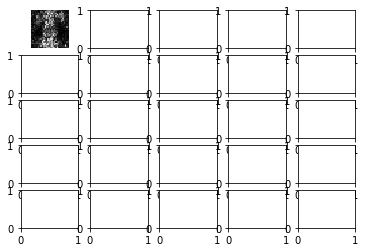

2751 [D loss: 0.577389, acc.: 70.31%] [G loss: 0.990620]
2752 [D loss: 0.584442, acc.: 73.44%] [G loss: 0.980235]
2753 [D loss: 0.603138, acc.: 68.75%] [G loss: 0.962018]
2754 [D loss: 0.585978, acc.: 71.88%] [G loss: 1.004623]
2755 [D loss: 0.667692, acc.: 60.94%] [G loss: 0.941992]
2756 [D loss: 0.557677, acc.: 73.44%] [G loss: 0.877658]
2757 [D loss: 0.602254, acc.: 67.19%] [G loss: 0.921801]
2758 [D loss: 0.639318, acc.: 60.94%] [G loss: 0.896855]
2759 [D loss: 0.584576, acc.: 70.31%] [G loss: 0.907786]
2760 [D loss: 0.601440, acc.: 65.62%] [G loss: 1.060741]
2761 [D loss: 0.621578, acc.: 68.75%] [G loss: 0.969541]
2762 [D loss: 0.634804, acc.: 60.94%] [G loss: 0.931042]
2763 [D loss: 0.656858, acc.: 64.06%] [G loss: 0.982383]
2764 [D loss: 0.582321, acc.: 65.62%] [G loss: 1.015057]
2765 [D loss: 0.697641, acc.: 50.00%] [G loss: 0.974272]
2766 [D loss: 0.611269, acc.: 68.75%] [G loss: 0.971741]
2767 [D loss: 0.613088, acc.: 68.75%] [G loss: 1.136348]
2768 [D loss: 0.573319, acc.: 7

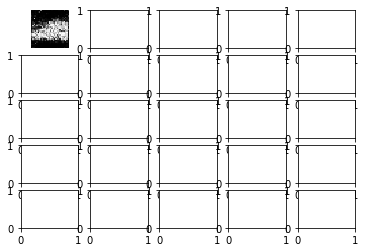

2801 [D loss: 0.546033, acc.: 75.00%] [G loss: 0.934591]
2802 [D loss: 0.637677, acc.: 59.38%] [G loss: 0.958494]
2803 [D loss: 0.599344, acc.: 70.31%] [G loss: 0.871627]
2804 [D loss: 0.621850, acc.: 70.31%] [G loss: 0.843881]
2805 [D loss: 0.620209, acc.: 62.50%] [G loss: 0.959702]
2806 [D loss: 0.653802, acc.: 59.38%] [G loss: 0.985734]
2807 [D loss: 0.600346, acc.: 65.62%] [G loss: 1.010633]
2808 [D loss: 0.562498, acc.: 73.44%] [G loss: 0.923656]
2809 [D loss: 0.641127, acc.: 62.50%] [G loss: 0.898745]
2810 [D loss: 0.640325, acc.: 60.94%] [G loss: 0.890356]
2811 [D loss: 0.520355, acc.: 73.44%] [G loss: 1.056951]
2812 [D loss: 0.584380, acc.: 70.31%] [G loss: 0.982645]
2813 [D loss: 0.579290, acc.: 67.19%] [G loss: 1.143003]
2814 [D loss: 0.666368, acc.: 60.94%] [G loss: 0.918923]
2815 [D loss: 0.652399, acc.: 62.50%] [G loss: 0.863706]
2816 [D loss: 0.628958, acc.: 59.38%] [G loss: 0.840215]
2817 [D loss: 0.645054, acc.: 60.94%] [G loss: 0.843945]
2818 [D loss: 0.622990, acc.: 6

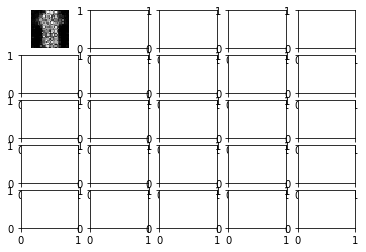

2851 [D loss: 0.718563, acc.: 50.00%] [G loss: 0.906711]
2852 [D loss: 0.618715, acc.: 70.31%] [G loss: 0.958270]
2853 [D loss: 0.655555, acc.: 62.50%] [G loss: 0.956588]
2854 [D loss: 0.595576, acc.: 71.88%] [G loss: 1.024252]
2855 [D loss: 0.590137, acc.: 68.75%] [G loss: 1.037614]
2856 [D loss: 0.600116, acc.: 67.19%] [G loss: 0.895135]
2857 [D loss: 0.622286, acc.: 73.44%] [G loss: 0.855014]
2858 [D loss: 0.637975, acc.: 57.81%] [G loss: 0.909674]
2859 [D loss: 0.600608, acc.: 65.62%] [G loss: 0.824485]
2860 [D loss: 0.595515, acc.: 65.62%] [G loss: 0.921911]
2861 [D loss: 0.534978, acc.: 76.56%] [G loss: 0.926672]
2862 [D loss: 0.600915, acc.: 60.94%] [G loss: 0.869640]
2863 [D loss: 0.639269, acc.: 64.06%] [G loss: 0.932433]
2864 [D loss: 0.619250, acc.: 67.19%] [G loss: 1.077175]
2865 [D loss: 0.564054, acc.: 71.88%] [G loss: 1.099441]
2866 [D loss: 0.629441, acc.: 68.75%] [G loss: 0.989125]
2867 [D loss: 0.678729, acc.: 60.94%] [G loss: 0.972856]
2868 [D loss: 0.645308, acc.: 5

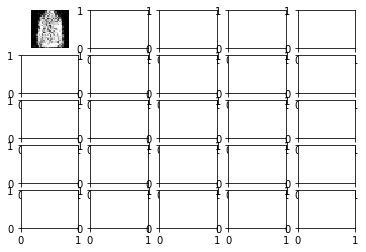

2901 [D loss: 0.650017, acc.: 60.94%] [G loss: 1.007259]
2902 [D loss: 0.668504, acc.: 59.38%] [G loss: 0.794943]
2903 [D loss: 0.622510, acc.: 64.06%] [G loss: 0.900618]
2904 [D loss: 0.631929, acc.: 59.38%] [G loss: 0.900657]
2905 [D loss: 0.594522, acc.: 68.75%] [G loss: 0.906071]
2906 [D loss: 0.601340, acc.: 68.75%] [G loss: 1.026725]
2907 [D loss: 0.595589, acc.: 70.31%] [G loss: 0.937868]
2908 [D loss: 0.638239, acc.: 70.31%] [G loss: 1.039616]
2909 [D loss: 0.671903, acc.: 67.19%] [G loss: 0.963155]
2910 [D loss: 0.677800, acc.: 53.12%] [G loss: 0.928839]
2911 [D loss: 0.598719, acc.: 65.62%] [G loss: 0.880566]
2912 [D loss: 0.564106, acc.: 81.25%] [G loss: 0.909314]
2913 [D loss: 0.641997, acc.: 54.69%] [G loss: 0.890913]
2914 [D loss: 0.645712, acc.: 65.62%] [G loss: 0.935367]
2915 [D loss: 0.681158, acc.: 60.94%] [G loss: 0.891712]
2916 [D loss: 0.589939, acc.: 73.44%] [G loss: 0.996850]
2917 [D loss: 0.631067, acc.: 62.50%] [G loss: 0.982059]
2918 [D loss: 0.595019, acc.: 6

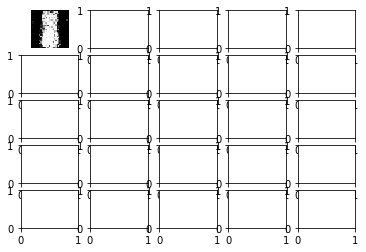

2951 [D loss: 0.646402, acc.: 64.06%] [G loss: 0.985672]
2952 [D loss: 0.698924, acc.: 59.38%] [G loss: 0.874765]
2953 [D loss: 0.637678, acc.: 57.81%] [G loss: 0.986267]
2954 [D loss: 0.634524, acc.: 65.62%] [G loss: 0.990826]
2955 [D loss: 0.604472, acc.: 67.19%] [G loss: 1.031716]
2956 [D loss: 0.675522, acc.: 50.00%] [G loss: 1.009285]
2957 [D loss: 0.581040, acc.: 75.00%] [G loss: 0.961850]
2958 [D loss: 0.661874, acc.: 59.38%] [G loss: 0.839704]
2959 [D loss: 0.652057, acc.: 60.94%] [G loss: 0.942060]
2960 [D loss: 0.642668, acc.: 65.62%] [G loss: 0.977830]
2961 [D loss: 0.603995, acc.: 67.19%] [G loss: 1.027576]
2962 [D loss: 0.651396, acc.: 62.50%] [G loss: 0.946620]
2963 [D loss: 0.584162, acc.: 73.44%] [G loss: 0.945241]
2964 [D loss: 0.599091, acc.: 70.31%] [G loss: 0.991427]
2965 [D loss: 0.607714, acc.: 65.62%] [G loss: 0.924781]
2966 [D loss: 0.591266, acc.: 67.19%] [G loss: 0.878957]
2967 [D loss: 0.668378, acc.: 59.38%] [G loss: 0.971148]
2968 [D loss: 0.605644, acc.: 7

In [47]:
epochs=3000
batch_size=32
sample_interval=50

#adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  #train Discriminator
  #select a random batch of images
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]
  
  noise = np.random.normal(0, 1, (batch_size, 100))
  
  #generate a batch of new images
  gen_imgs = generator.predict(noise)
  
  #train the discriminator
  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
  
  #train Generator
  noise = np.random.normal(0, 1, (batch_size, 100))
  
  #train the generator (to have the discriminator label samples as valid)
  g_loss = combined.train_on_batch(noise, valid)
  
  #plot the progress
  print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
  
  #if at save interval => save generated image samples
  if epoch % sample_interval == 0:
    sample_images(epoch)

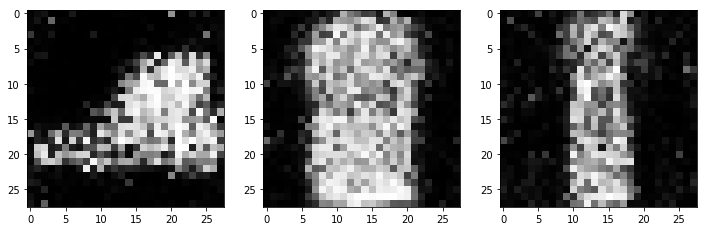

In [48]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()